# Description of the notebook

Students:
- Teka Kimbi Ntimanputu (10673197)
- William Stucchi (10661711)
- Lorenzo Veronese (10654901)

This notebook is one of the experiments described in Section III of the report. The resulting model reached a performance of 0.0068 MSE on the phase 1 remote dataset.

This notebook also contains the code initially implemented to perform data augmentation: since this technique was not successful, it has been discarded in the subsequent steps.

# Libraries

In [1]:
# Fix randomness and hide warnings
seed = 42

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import numpy as np
np.random.seed(seed)

import logging

import random
random.seed(seed)

In [2]:
# Import tensorflow
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)
print(tf.__version__)

2.15.0


In [3]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
plt.rc('font', size=16)
from sklearn.preprocessing import MinMaxScaler

# Import data

Google Drive:

In [4]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive', force_remount=True)
%cd /content/gdrive/My Drive/Colab Notebooks/ANNDL/Challenge2

Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/ANNDL/Challenge2


Open the zip file containing the dataset (Note: this is without padding):

In [5]:
import zipfile

# Replace 'your_file.zip' with the actual name of your zip file
zip_file_name = 'training_dataset_preprocessed.zip'

# Read the zip file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    # Extract all the contents to a folder (you can change the destination folder)
    zip_ref.extractall('/content/dataset')

In [6]:
import numpy as np

categories = np.load('/content/dataset/categories.npy', allow_pickle=True)
print(categories)

['D' 'D' 'D' ... 'F' 'F' 'F']


In [7]:
training_data = np.load('/content/dataset/training_dataset_no_padding.npy', allow_pickle=True)
print(training_data)

[array([0.49166667, 0.5240741 , 0.54444444, 0.46388888, 0.40648147,
        0.35462964, 0.31296295, 0.36666667, 0.38333333, 0.27962962,
        0.23796296, 0.2574074 , 0.47962964, 0.4324074 , 0.53518516,
        0.48055556, 0.37592593, 0.3861111 , 0.32685184, 0.36666667,
        0.25555557, 0.23981482, 0.21111111, 0.26481482, 0.46851853,
        0.46944445, 0.41666666, 0.4398148 , 0.3611111 , 0.32592592,
        0.3074074 , 0.3425926 , 0.28611112, 0.2787037 , 0.18425927,
        0.21111111, 0.38518518, 0.375     , 0.44444445, 0.32962963,
        0.38981482, 0.29444444, 0.27037036, 0.3351852 , 0.31666666,
        0.3148148 , 0.2888889 , 0.31203705, 0.39444444, 0.475     ,
        0.51666665, 0.47685185, 0.47777778, 0.37222221, 0.32685184,
        0.43888888, 0.35833332, 0.40648147, 0.36944443, 0.38981482,
        0.5546296 , 0.53333336, 0.5537037 , 0.53518516, 0.48333332,
        0.5046296 , 0.42777777, 0.4787037 , 0.46666667, 0.42962962,
        0.43888888, 0.41296297, 0.55833334, 0.52

In [8]:
valid_periods = np.load('/content/dataset/valid_periods.npy', allow_pickle=True)
print(valid_periods)

[[2325 2776]
 [2325 2776]
 [2325 2776]
 ...
 [2676 2776]
 [2676 2776]
 [2676 2776]]


# Explore data

Plot the time series and print some characteristics of the data:

In [9]:
print(type(categories))
categories_names, counts = np.unique(categories, return_counts=True)
for letter, count in zip(categories_names, counts):
    print(f"Letter {letter}: {count} occurrences")

<class 'numpy.ndarray'>
Letter A: 5728 occurrences
Letter B: 10987 occurrences
Letter C: 10017 occurrences
Letter D: 10016 occurrences
Letter E: 10975 occurrences
Letter F: 277 occurrences


In [10]:
print("categories: ", len(categories))
print("training_data: ", len(training_data))
print("valid_periods: ", len(valid_periods))

categories:  48000
training_data:  48000
valid_periods:  48000


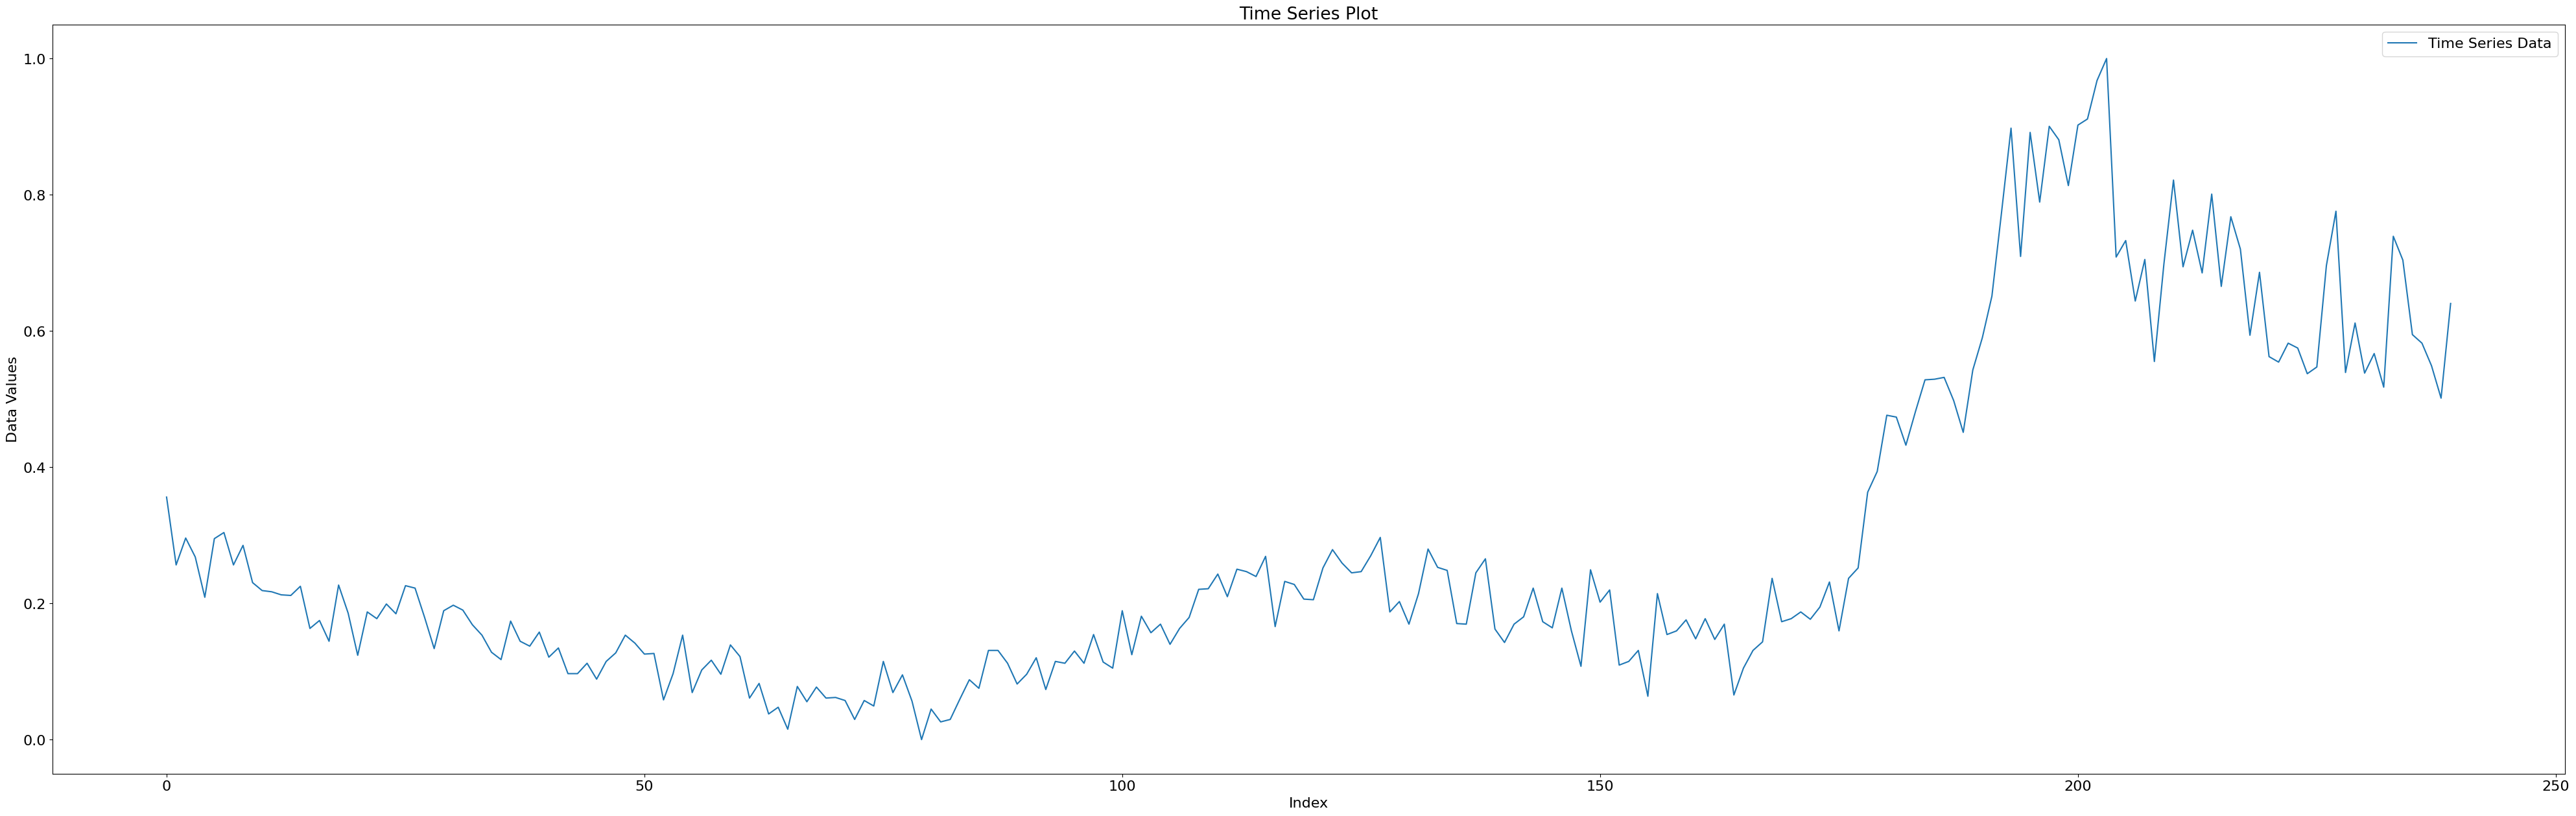

In [11]:
import matplotlib.pyplot as plt

stop = 0
for i, (data, category) in enumerate(zip(training_data, categories)):
    if(category == 'A'):
        plt.figure(figsize=(50, 15))
        plt.plot(training_data[i], label='Time Series Data')
        plt.title('Time Series Plot')
        plt.xlabel('Index')
        plt.ylabel('Data Values')
        plt.legend()
        plt.show()

        stop += 1
        if(stop==1): break

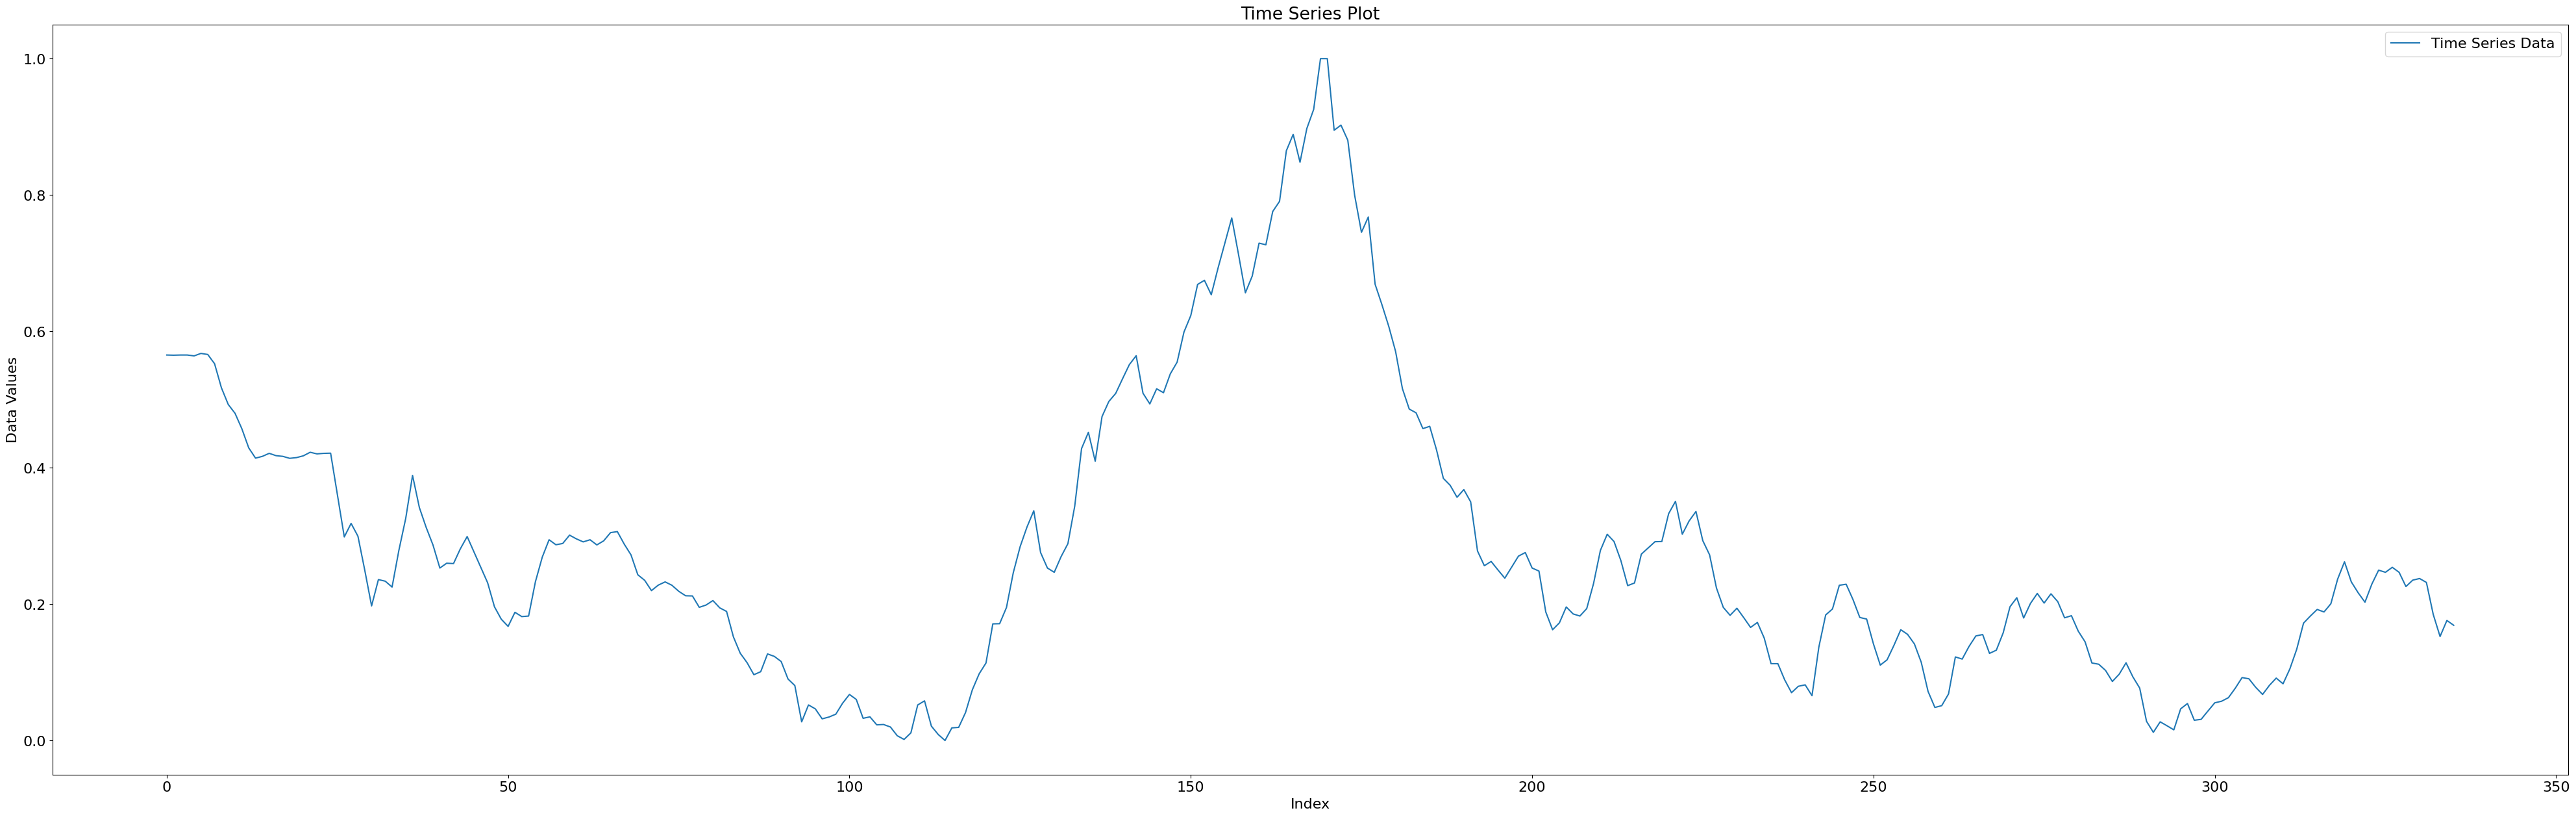

In [12]:
import matplotlib.pyplot as plt

stop = 0
for i, (data, category) in enumerate(zip(training_data, categories)):
    if(category == 'B'):
        plt.figure(figsize=(50, 15))
        plt.plot(training_data[i], label='Time Series Data')
        plt.title('Time Series Plot')
        plt.xlabel('Index')
        plt.ylabel('Data Values')
        plt.legend()
        plt.show()

        stop += 1
        if(stop==1): break

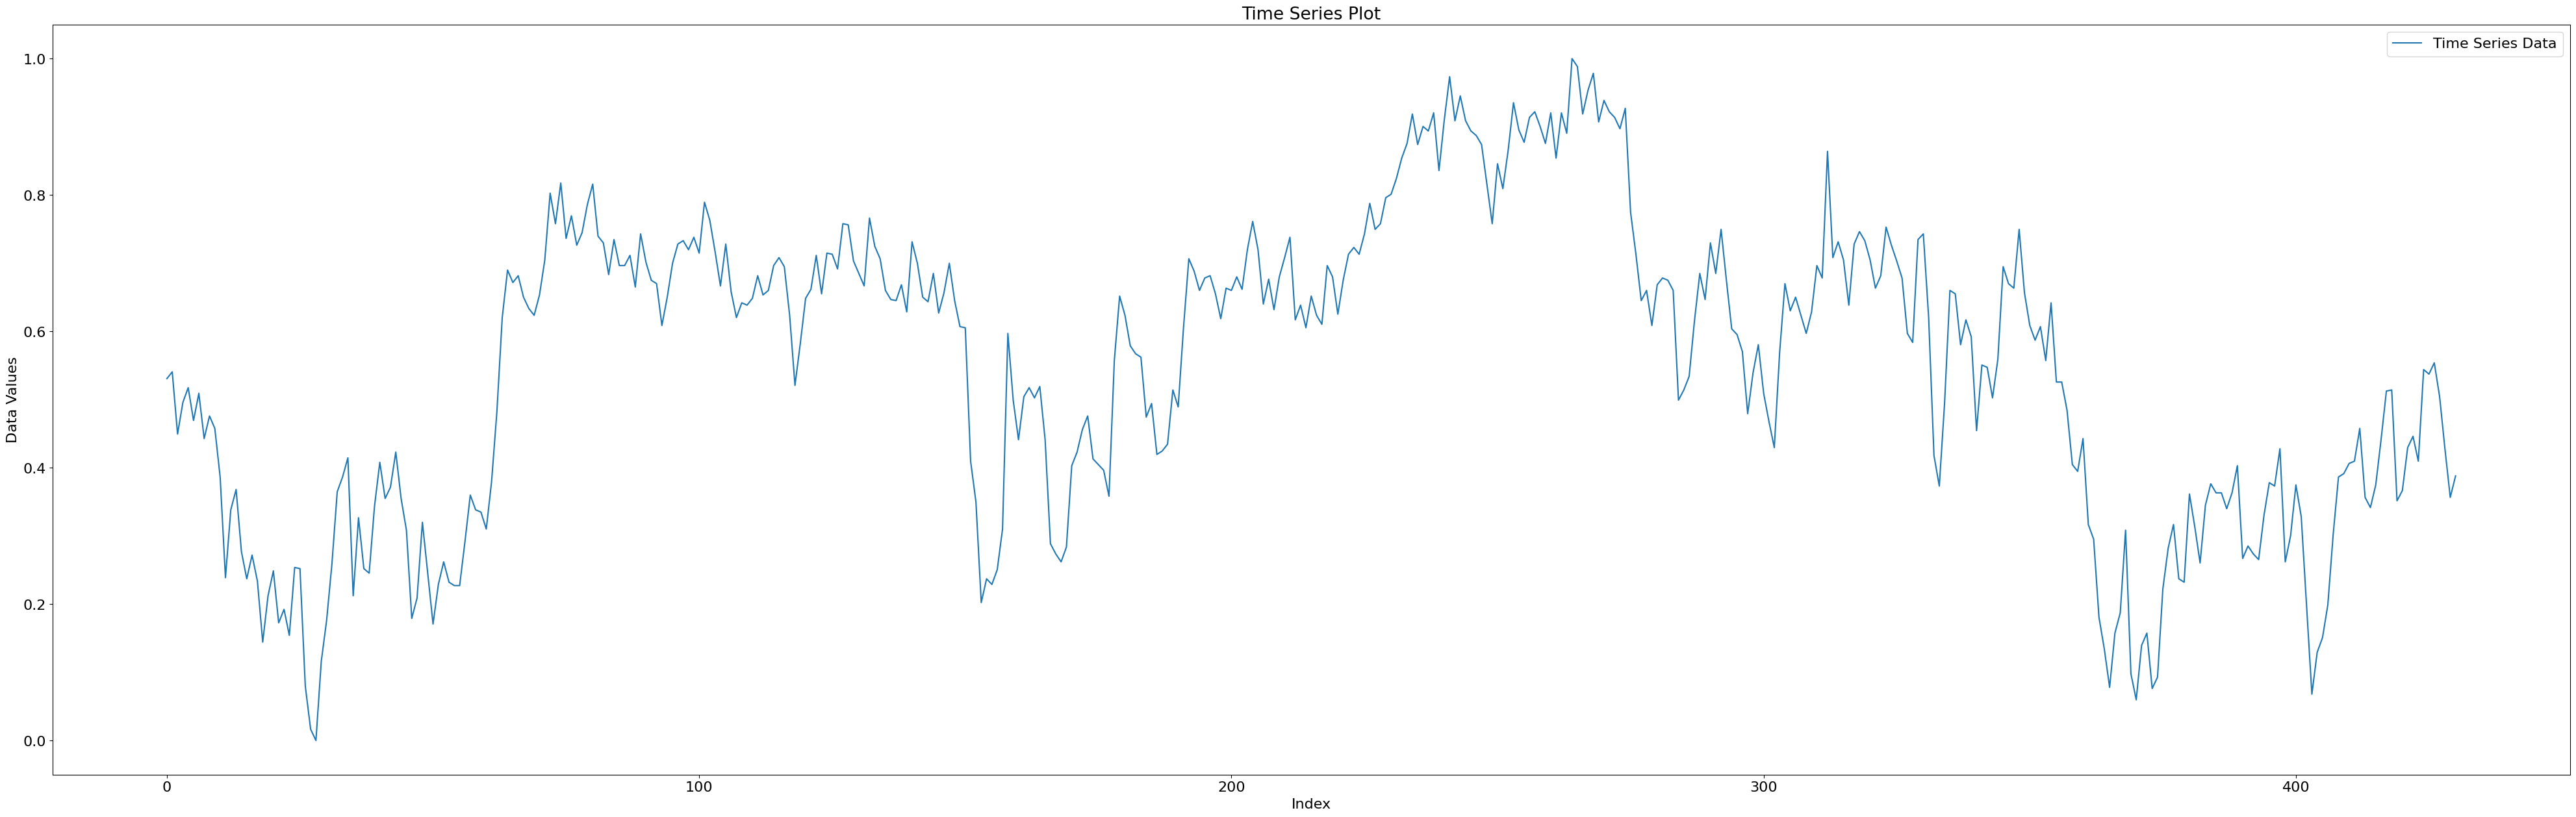

In [13]:
import matplotlib.pyplot as plt

stop = 0
for i, (data, category) in enumerate(zip(training_data, categories)):
    if(category == 'C'):
        plt.figure(figsize=(50, 15))
        plt.plot(training_data[i], label='Time Series Data')
        plt.title('Time Series Plot')
        plt.xlabel('Index')
        plt.ylabel('Data Values')
        plt.legend()
        plt.show()

        stop += 1
        if(stop==1): break

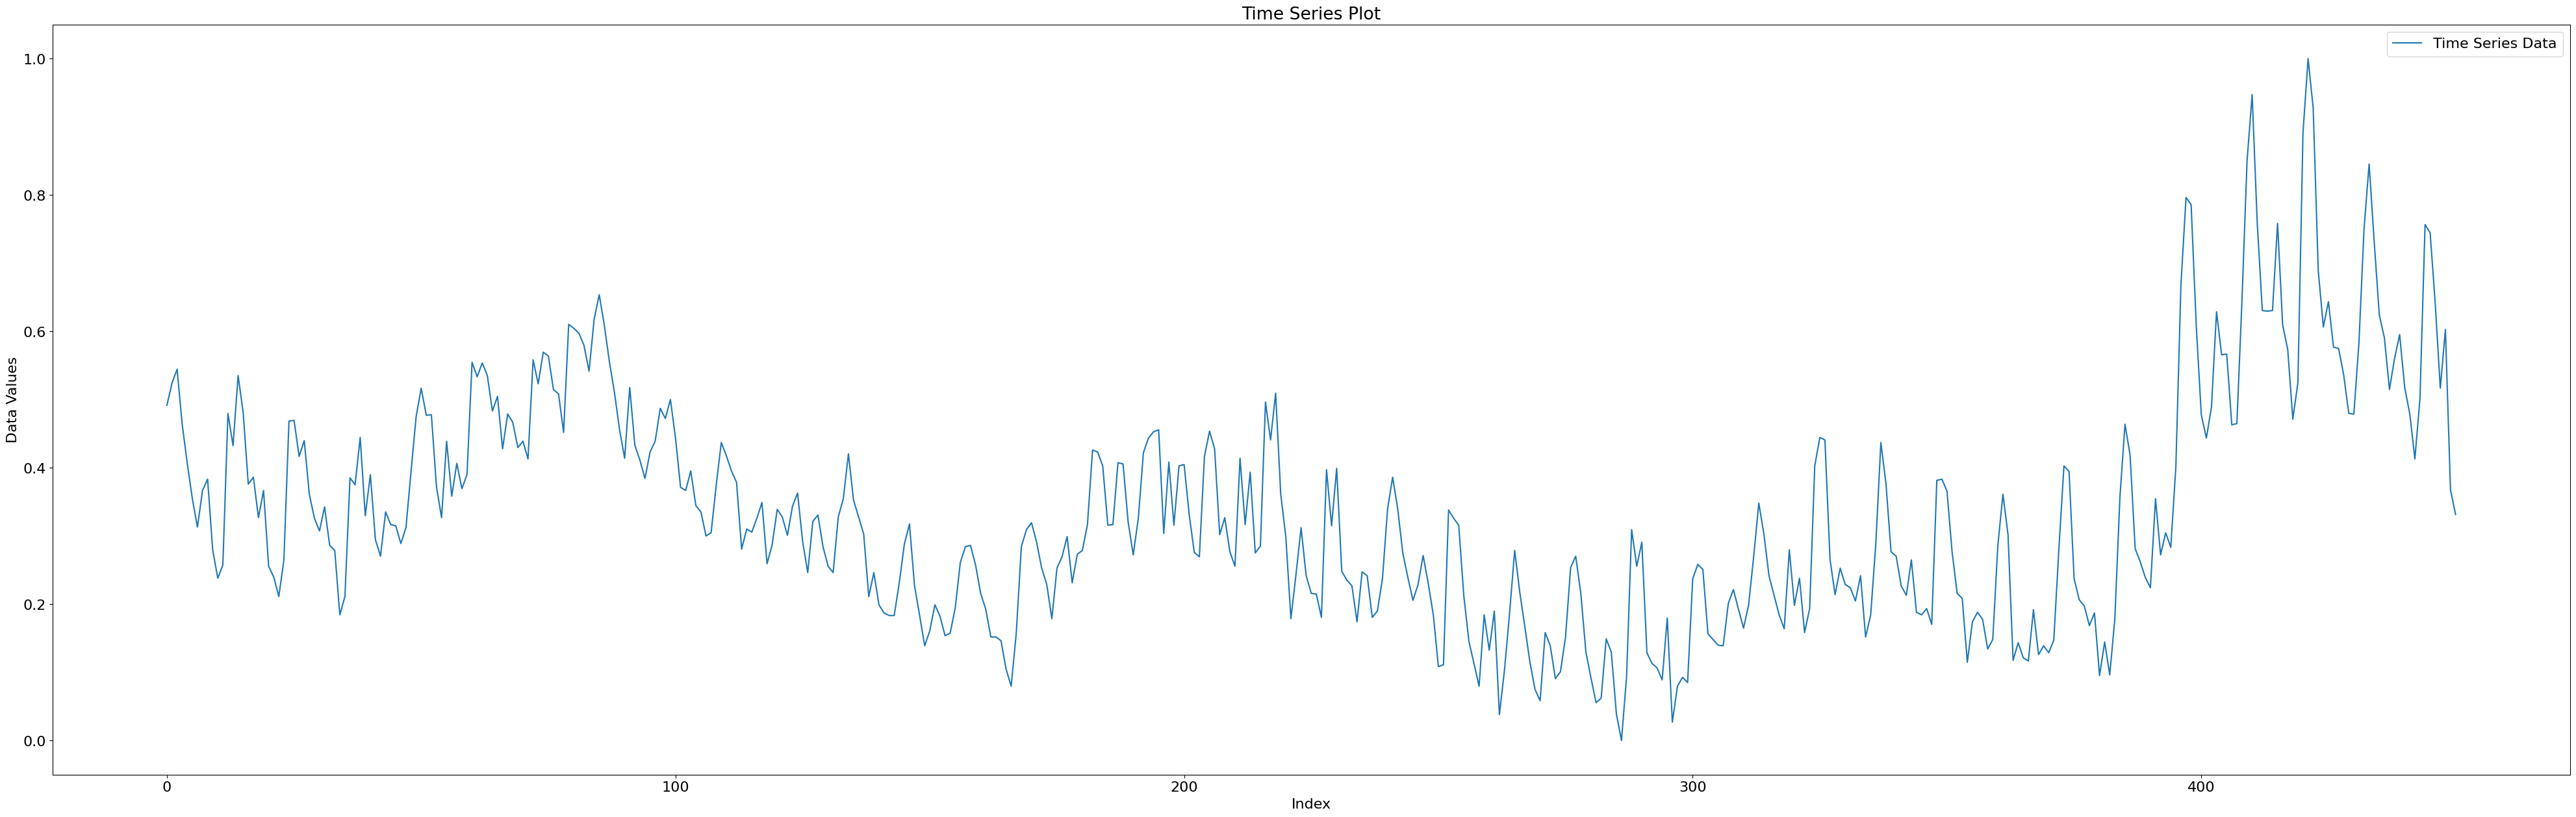

In [14]:
import matplotlib.pyplot as plt

stop = 0
for i, (data, category) in enumerate(zip(training_data, categories)):
    if(category == 'D'):
        plt.figure(figsize=(50, 15))
        plt.plot(training_data[i], label='Time Series Data')
        plt.title('Time Series Plot')
        plt.xlabel('Index')
        plt.ylabel('Data Values')
        plt.legend()
        plt.show()

        stop += 1
        if(stop==1): break

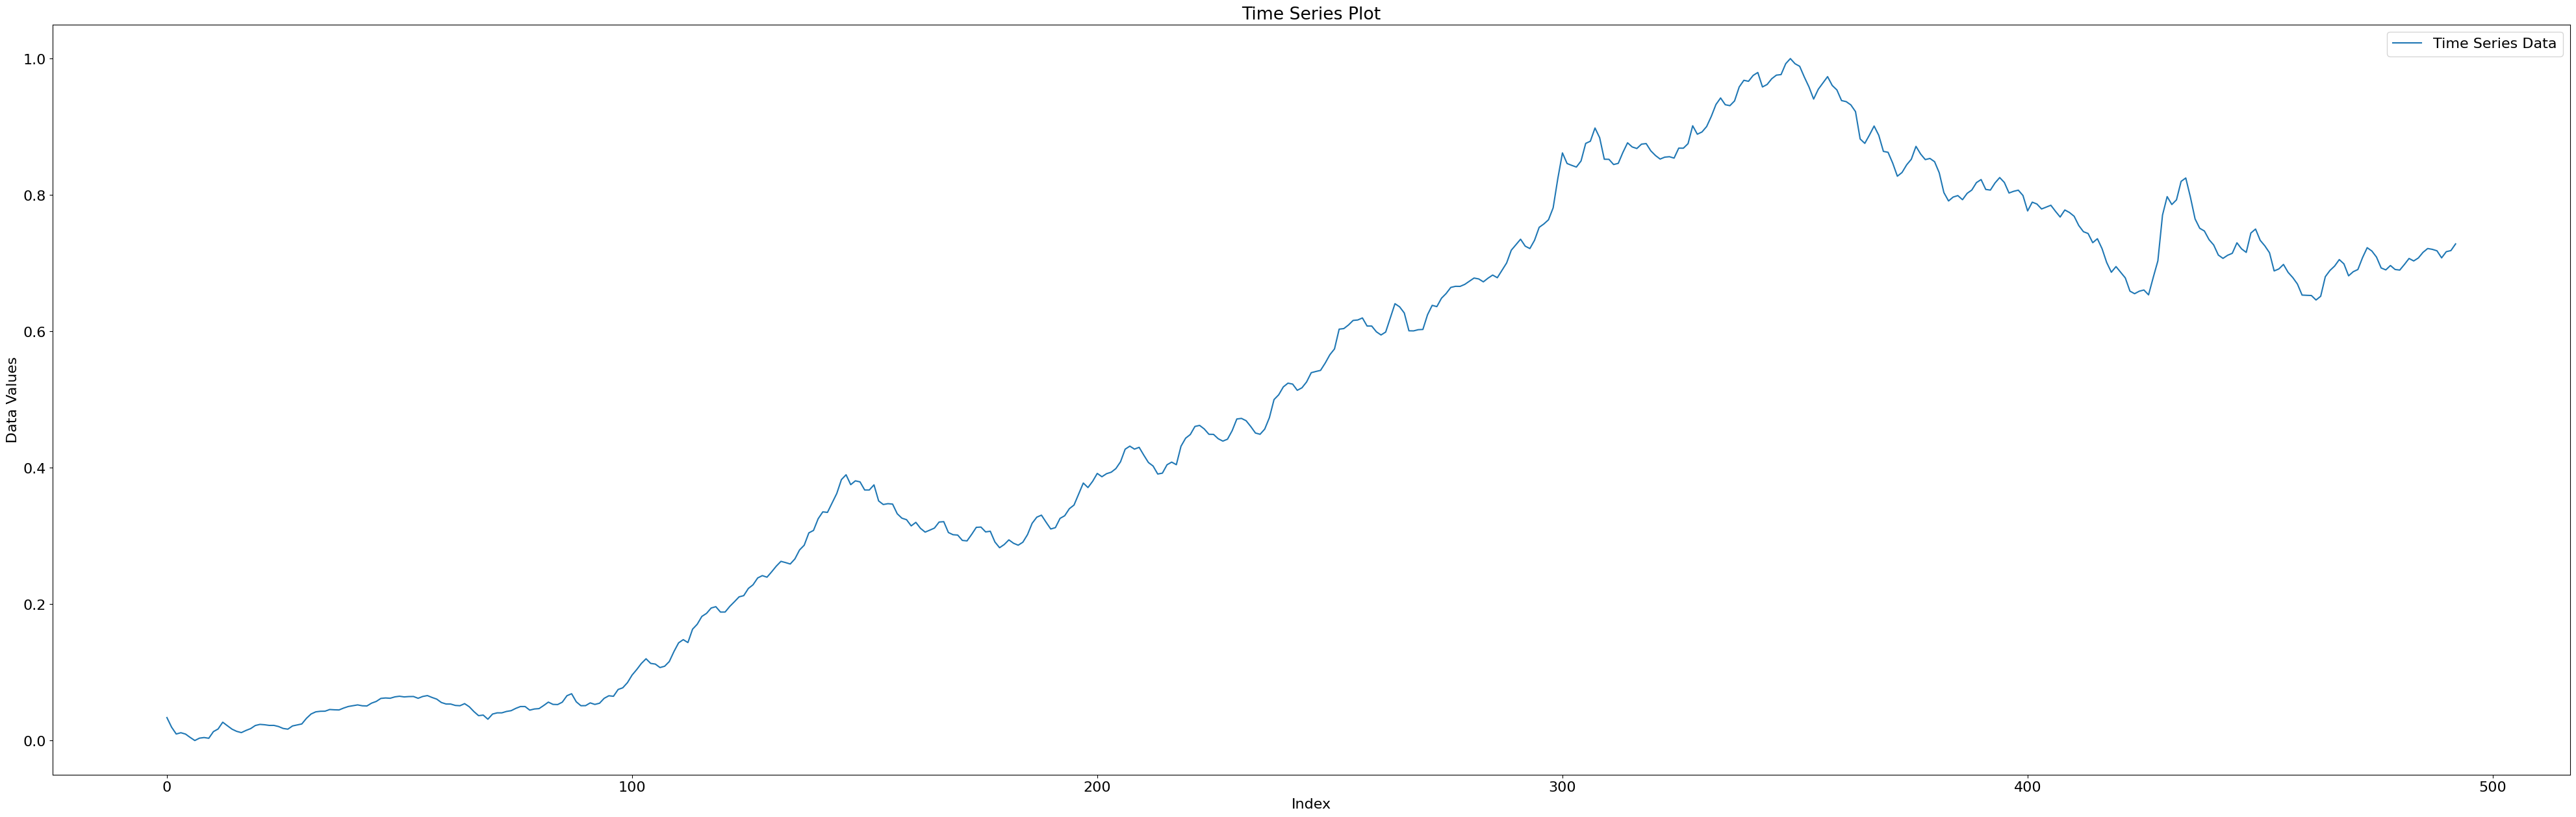

In [15]:
import matplotlib.pyplot as plt

stop = 0
for i, (data, category) in enumerate(zip(training_data, categories)):
    if(category == 'E'):
        plt.figure(figsize=(50, 15))
        plt.plot(training_data[i], label='Time Series Data')
        plt.title('Time Series Plot')
        plt.xlabel('Index')
        plt.ylabel('Data Values')
        plt.legend()
        plt.show()

        stop += 1
        if(stop==1): break

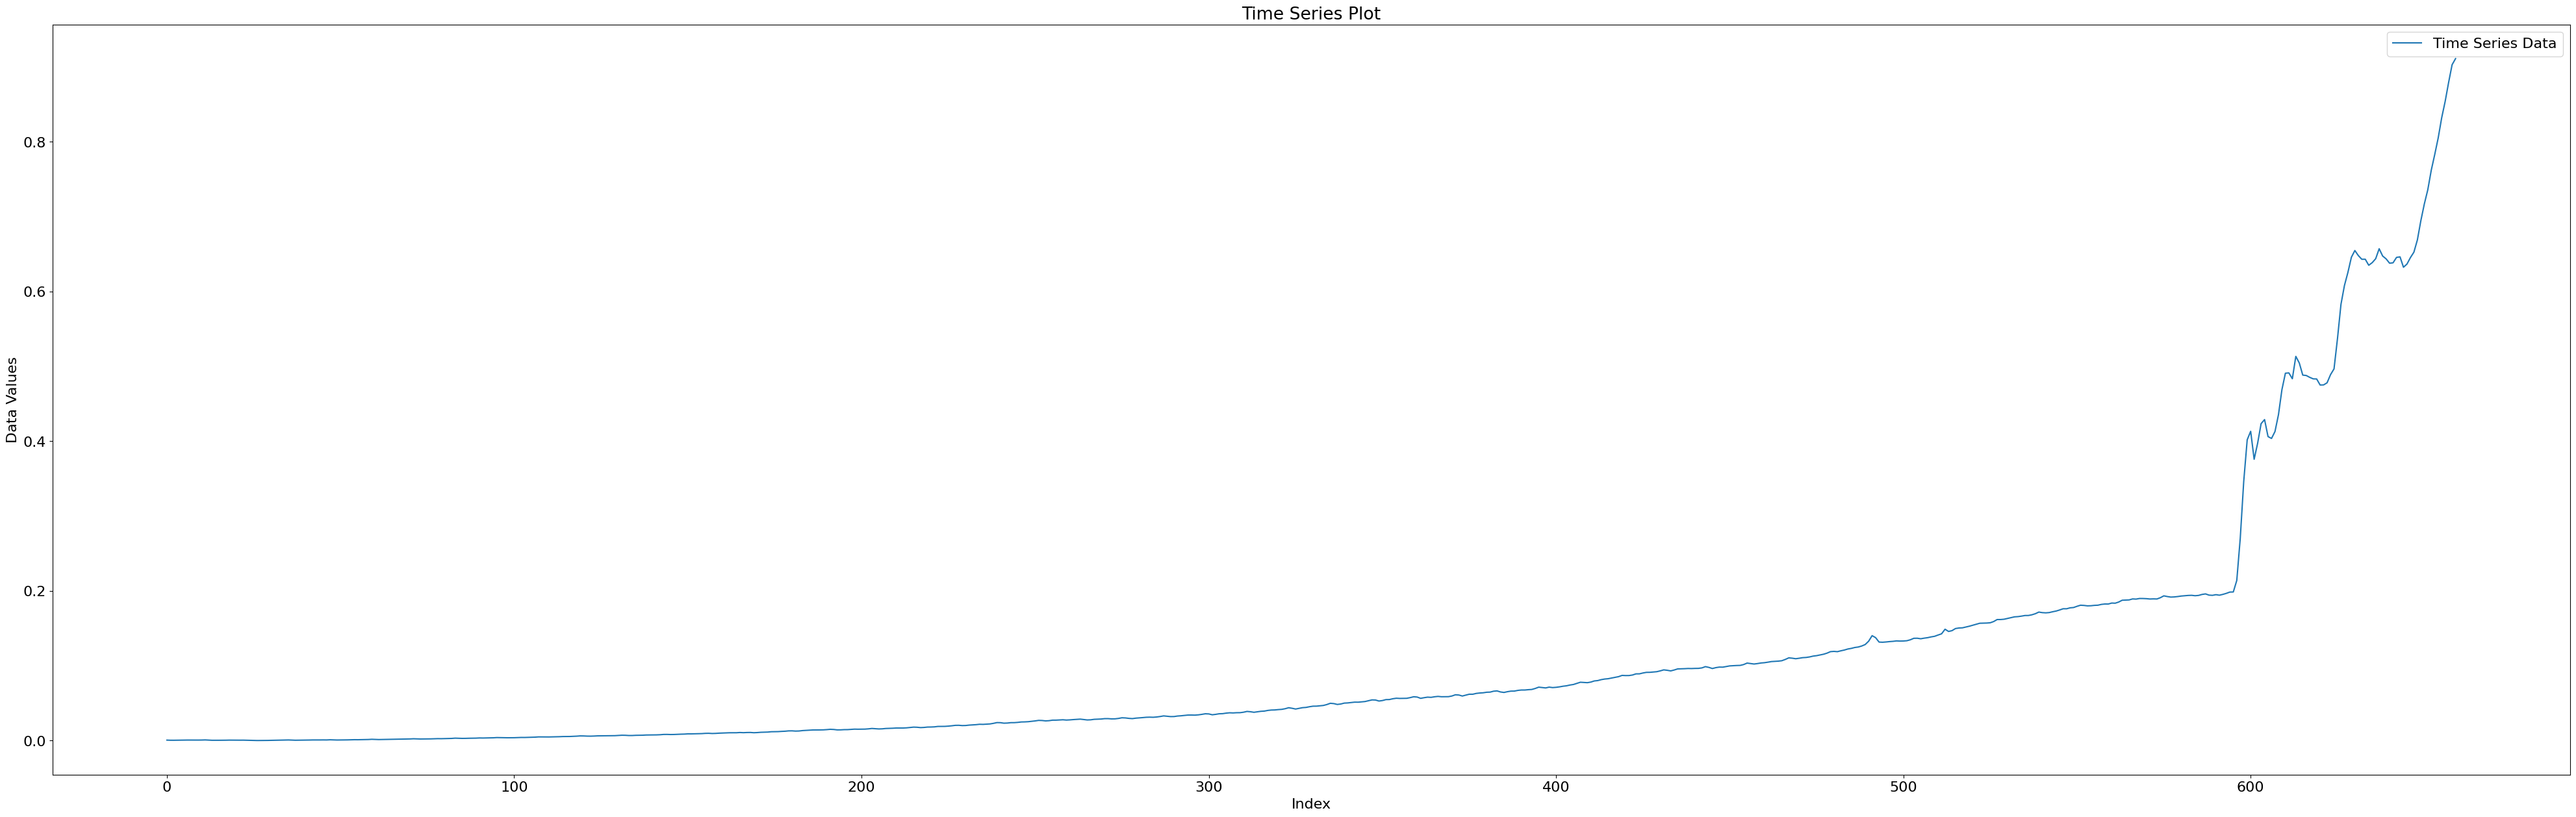

In [16]:
import matplotlib.pyplot as plt

stop = 0
for i, (data, category) in enumerate(zip(training_data, categories)):
    if(category == 'F'):
        plt.figure(figsize=(50, 15))
        plt.plot(training_data[i], label='Time Series Data')
        plt.title('Time Series Plot')
        plt.xlabel('Index')
        plt.ylabel('Data Values')
        plt.legend()
        plt.show()

        stop += 1
        if(stop==1): break

# Training-validation split

Create data structures useful for the subsequent steps and create a version of the dataset where all time series of each category are separated from the others:

In [17]:
categories_names, counts = np.unique(categories, return_counts=True)
dataset_by_categories = [[], [], [], [], [], []]
index_to_category = {
    0 : 'A',
    1 : 'B',
    2 : 'C',
    3 : 'D',
    4 : 'E',
    5 : 'F'
}
category_to_index = {
    'A' : 0,
    'B' : 1,
    'C' : 2,
    'D' : 3,
    'E' : 4,
    'F' : 5
}


for i, (data, category) in enumerate(zip(training_data, categories)):
    dataset_by_categories[category_to_index[category]].append(data)

dataset_by_categories = np.array(dataset_by_categories)
dataset_by_categories[0][0]

array([0.3560538 , 0.25650224, 0.29596412, 0.26816145, 0.20896861,
       0.29506725, 0.30403587, 0.25650224, 0.2852018 , 0.23049328,
       0.21883409, 0.21704036, 0.21255605, 0.2116592 , 0.22511211,
       0.1632287 , 0.1748879 , 0.14439462, 0.22690582, 0.18565023,
       0.12376682, 0.18744394, 0.17757848, 0.19910313, 0.18475336,
       0.22600897, 0.22242153, 0.17937219, 0.13363229, 0.18923767,
       0.19730942, 0.19013453, 0.16860987, 0.15336323, 0.12825112,
       0.11748879, 0.17399102, 0.14439462, 0.13721973, 0.15784754,
       0.12107623, 0.13452914, 0.09686099, 0.09686099, 0.11210762,
       0.08878924, 0.1147982 , 0.12735426, 0.15336323, 0.14170404,
       0.12556054, 0.1264574 , 0.05829597, 0.09686099, 0.15336323,
       0.0690583 , 0.10224215, 0.11659193, 0.09596413, 0.13901345,
       0.1219731 , 0.06098655, 0.08251121, 0.03766816, 0.04753363,
       0.01524664, 0.07802691, 0.05560538, 0.07713004, 0.06098655,
       0.06188341, 0.0573991 , 0.02959641, 0.0573991 , 0.04932

Shuffle the the time series contained inside each category list:

In [18]:
np.random.seed(42)
for category in dataset_by_categories:
    np.random.shuffle(category)
dataset_by_categories[0][0]

array([0.09083416, 0.11135604, 0.11138821, 0.09512629, 0.08606377,
       0.07637145, 0.07420266, 0.0756048 , 0.09573994, 0.08537591,
       0.07476568, 0.04915958, 0.06078921, 0.08370345, 0.07865696,
       0.07128735, 0.06438264, 0.0576733 , 0.05626497, 0.07262265,
       0.06024503, 0.05874837, 0.05553907, 0.04201939, 0.04707289,
       0.05678718, 0.03323365, 0.0280992 , 0.03061388, 0.0334106 ,
       0.01862821, 0.03345053, 0.02059251, 0.03819083, 0.02437792,
       0.        , 0.00745116, 0.01712146, 0.01622909, 0.00408256,
       0.0217185 , 0.01059223, 0.04549293, 0.05330395, 0.02902577,
       0.03558172, 0.03650588, 0.02626428, 0.03722911, 0.05024905,
       0.00864775, 0.0173225 , 0.04477011, 0.04620855, 0.03100943,
       0.04506579, 0.03359981, 0.02668526, 0.01542394, 0.00135165,
       0.01480574, 0.00576223, 0.00470582, 0.03176446, 0.03020446,
       0.02699236, 0.01540042, 0.03301539, 0.02092402, 0.01173632,
       0.03720886, 0.02868418, 0.05255431, 0.03497124, 0.02287

Based on the percentage of the validation set (perc), split the dataset in to training and validation, taking a percentage from each category list:

In [19]:
import math

perc = 0.1

X_train_raw_by_category = []
X_val_raw_by_category = []

for category in dataset_by_categories:
    tot_len = len(category)
    val_len = math.ceil(tot_len * perc)
    X_train_raw_by_category.append(category[ : tot_len-val_len])
    X_val_raw_by_category.append(category[tot_len-val_len : ])

for (train_category, val_category) in zip(X_train_raw_by_category, X_val_raw_by_category):
    print("Length of train: ", len(train_category), "- Length of val: ", len(val_category))

Length of train:  5155 - Length of val:  573
Length of train:  9888 - Length of val:  1099
Length of train:  9015 - Length of val:  1002
Length of train:  9014 - Length of val:  1002
Length of train:  9877 - Length of val:  1098
Length of train:  249 - Length of val:  28


Unify all the lists into one single list (unify all categories):

In [20]:
X_train_raw = []
X_val_raw = []
train_categories = []
val_categories = []

for index, (train_category, val_category) in enumerate(zip(X_train_raw_by_category, X_val_raw_by_category)):
    for sequence in train_category:
        X_train_raw.append(sequence)
    for sequence in val_category:
        X_val_raw.append(sequence)

    for i in range(len(train_category)):
        train_categories.append(index_to_category[index])
    for i in range(len(val_category)):
        val_categories.append(index_to_category[index])

print("Length train: ", len(X_train_raw))
print("Length val: ", len(X_val_raw))
X_train_raw = np.array(X_train_raw)
X_val_raw = np.array(X_val_raw)

Length train:  43198
Length val:  4802


# Data augmentation

Function to cut values under 0 or above 1 to 0 and 1 respectively:

In [21]:
def fix_normalization(seq):
    for i, el in enumerate(seq): #ensure not exceed range
        if el>1:
            seq[i] = 1
        elif el < -1:
            seq[i] = -1

    return seq

Add normal noise:

In [22]:
def normal_add(seq, sigma=0.1):
    return fix_normalization(np.add(seq, np.random.normal(loc=0., scale=sigma, size=len(seq))))

Multiply normal noise:

In [23]:
def normal_mul(seq, sigma=0.1):
    factors = np.random.normal(loc=1., scale=sigma, size=len(seq))
    return fix_normalization(np.multiply(seq, factors))

Create augmented time series:

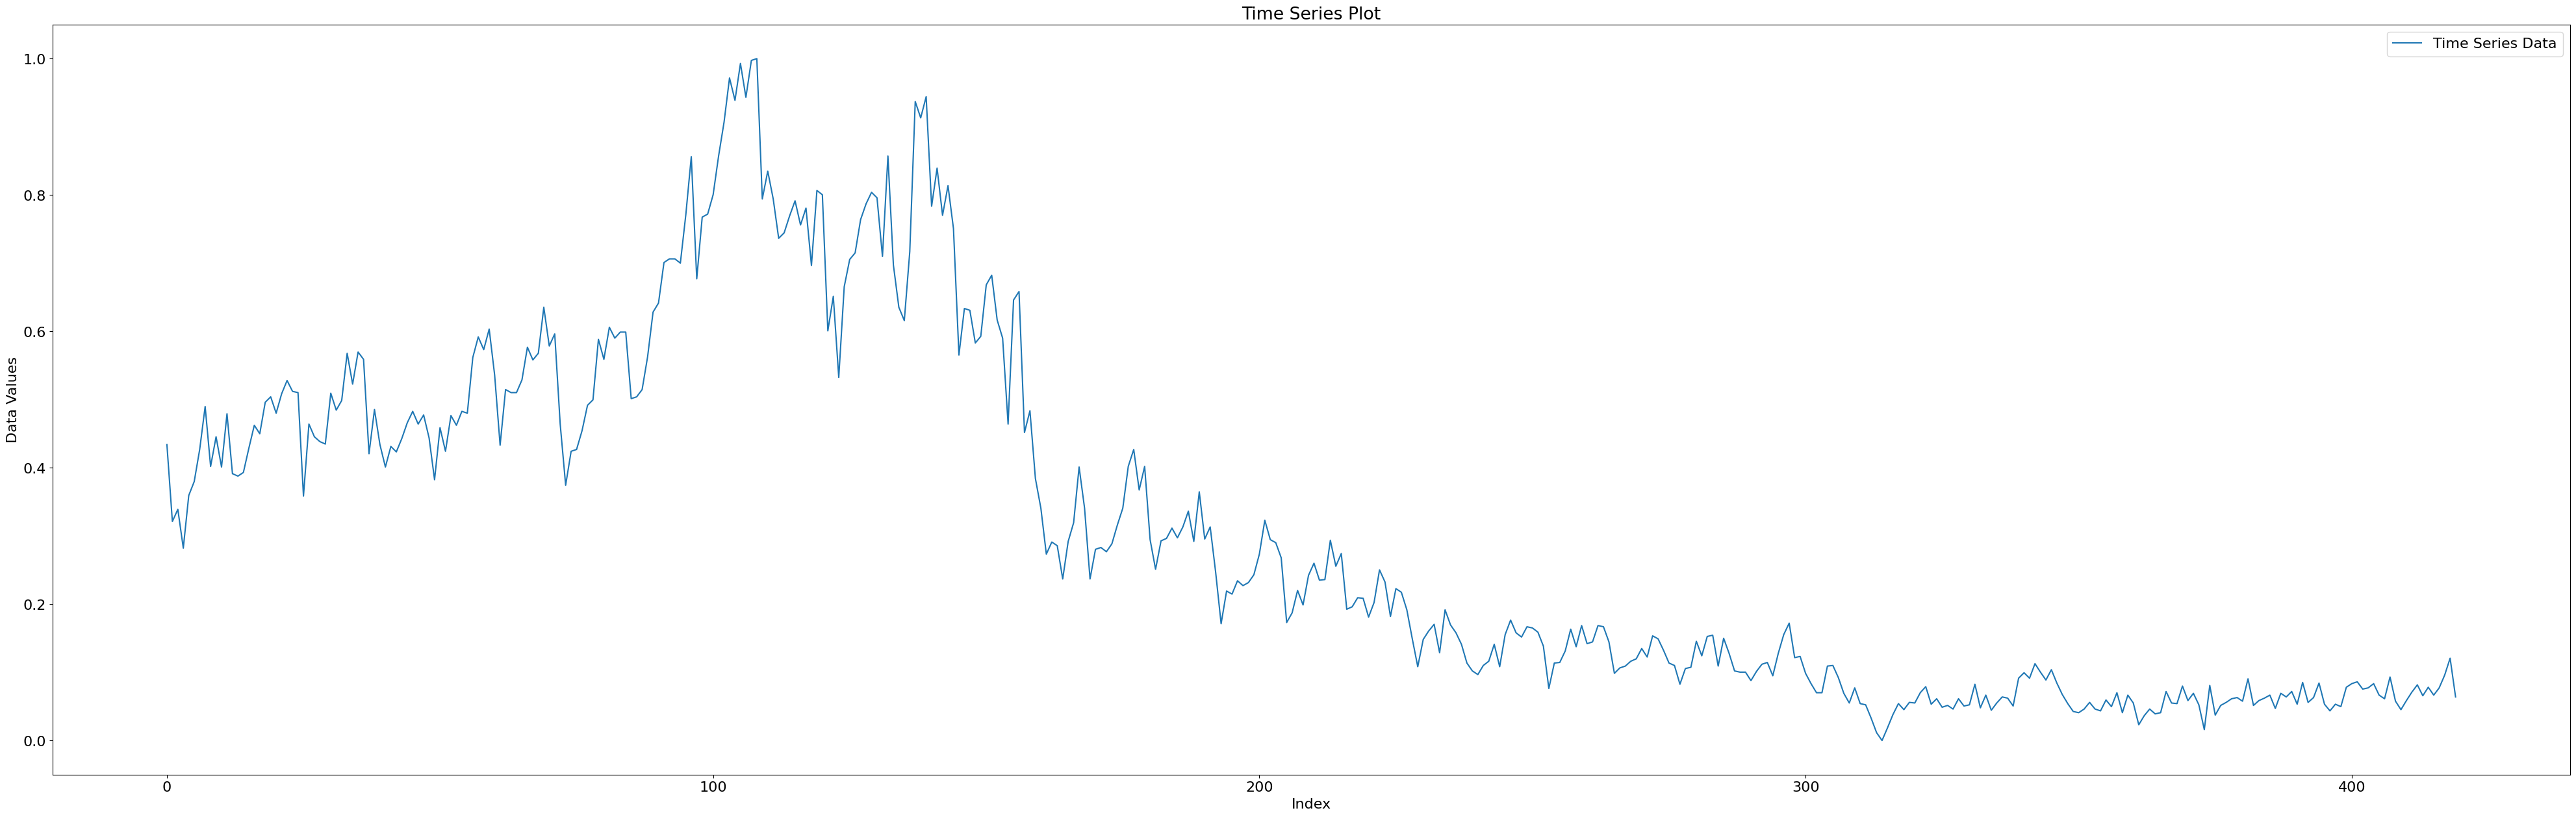

In [24]:
import copy

perc_aug = 0

for i in range(int(len(X_train_raw) * perc_aug)):
    rand_seq_index = np.random.randint(len(X_train_raw))
    rand_aug = np.random.randint(2)
    if rand_aug == 0:
        aug_seq = normal_add(X_train_raw[rand_seq_index])
        X_train_raw.append(normal_add(X_train_raw[rand_seq_index]))
        train_categories.append(train_categories[rand_seq_index])
    elif rand_aug == 1:
        aug_seq = normal_mul(X_train_raw[rand_seq_index])
        X_train_raw.append(normal_mul(X_train_raw[rand_seq_index]))
        train_categories.append(train_categories[rand_seq_index])

plt.figure(figsize=(50, 15))
plt.plot(X_train_raw[-1], label='Time Series Data')
plt.title('Time Series Plot')
plt.xlabel('Index')
plt.ylabel('Data Values')
plt.legend()
plt.show()

In [25]:
X_train_raw = np.array(X_train_raw)
X_val_raw = np.array(X_val_raw)
train_categories = np.array(train_categories)
val_categories = np.array(val_categories)

Shuffle another time over the classes:

In [26]:
print(train_categories[0:10])

['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A']


In [27]:
indices = np.random.permutation(len(X_train_raw))
X_train_raw = X_train_raw[indices]
train_categories = train_categories[indices]

indices = np.random.permutation(len(X_val_raw))
X_val_raw = X_val_raw[indices]
val_categories = val_categories[indices]

In [28]:
print(train_categories[0:10])

['C' 'E' 'A' 'B' 'E' 'E' 'C' 'B' 'B' 'A']


# Create windows

Build windows and targets:

In [29]:
def build_sequences(df, window, stride, telescope): #telescope is k, how many samples to predict
    # Sanity check to avoid runtime errors
    assert window % stride == 0
    dataset = []
    labels = []
    temp_df = df.copy()
    temp_label = df.copy()
    padding_check = len(df)%window

    if(padding_check != 0):
        # Compute padding length
        padding_len = window - len(df)%window
        padding = np.zeros(padding_len, dtype='float32')
        temp_df = np.concatenate((padding,df))
        temp_label = np.concatenate((padding,temp_label))
        assert len(temp_df) % window == 0

    for idx in np.arange(0,len(temp_df)-window-telescope,stride): #for each window, append values and also the values of telescope
        dataset.append(temp_df[idx:idx+window])
        labels.append(temp_label[idx+window:idx+window+telescope])
        # I get a series of chunk of a window. The label is a sequence of len telescope, which is what I should predict from the values in the window
        # Note that each chunk is 3 signals

    dataset = np.array(dataset)
    labels = np.array(labels)
    return dataset, labels

def build_dataset_no_category(initial_dataset, window, stride, telescope):
    dataset = []
    labels = []
    dataset_of_sequence = []
    labels_of_sequence = []
    for sequence_input in initial_dataset:
        dataset_of_sequence, labels_of_sequence = build_sequences(sequence_input, window, stride, telescope)
        for sequence, label in zip(dataset_of_sequence, labels_of_sequence):
            dataset.append(sequence) #for dimension issue
            labels.append(label)

    dataset = np.array(dataset)
    labels = np.array(labels)

    return dataset, labels

In [30]:
X_train, y_train = build_dataset_no_category(X_train_raw, window=200, stride=20, telescope=9)
X_train = np.expand_dims(X_train, axis=-1)
y_train = np.expand_dims(y_train, axis=-1)
X_val, y_val = build_dataset_no_category(X_val_raw, window=200, stride=20, telescope=9)
X_val = np.expand_dims(X_val, axis=-1)
y_val = np.expand_dims(y_val, axis=-1)

In [31]:
print(X_train.shape)

(242040, 200, 1)


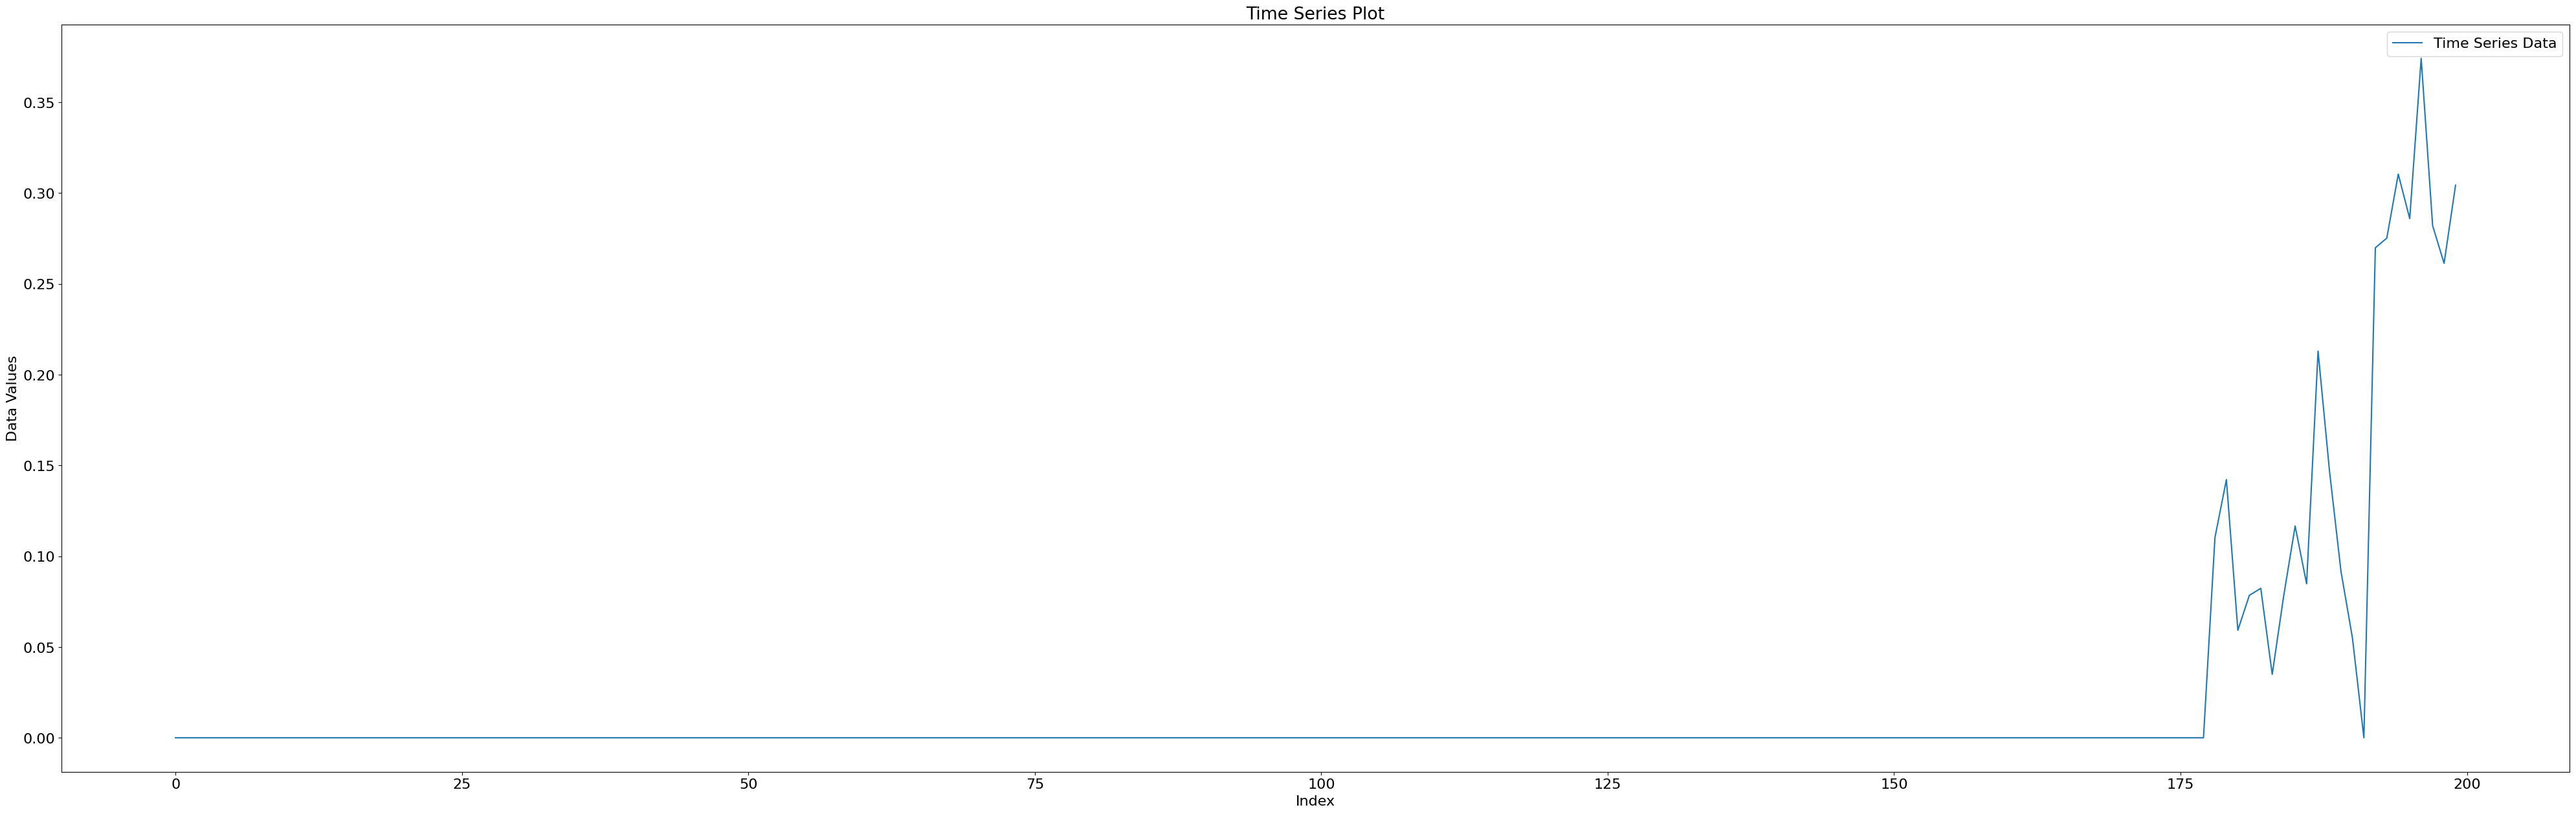

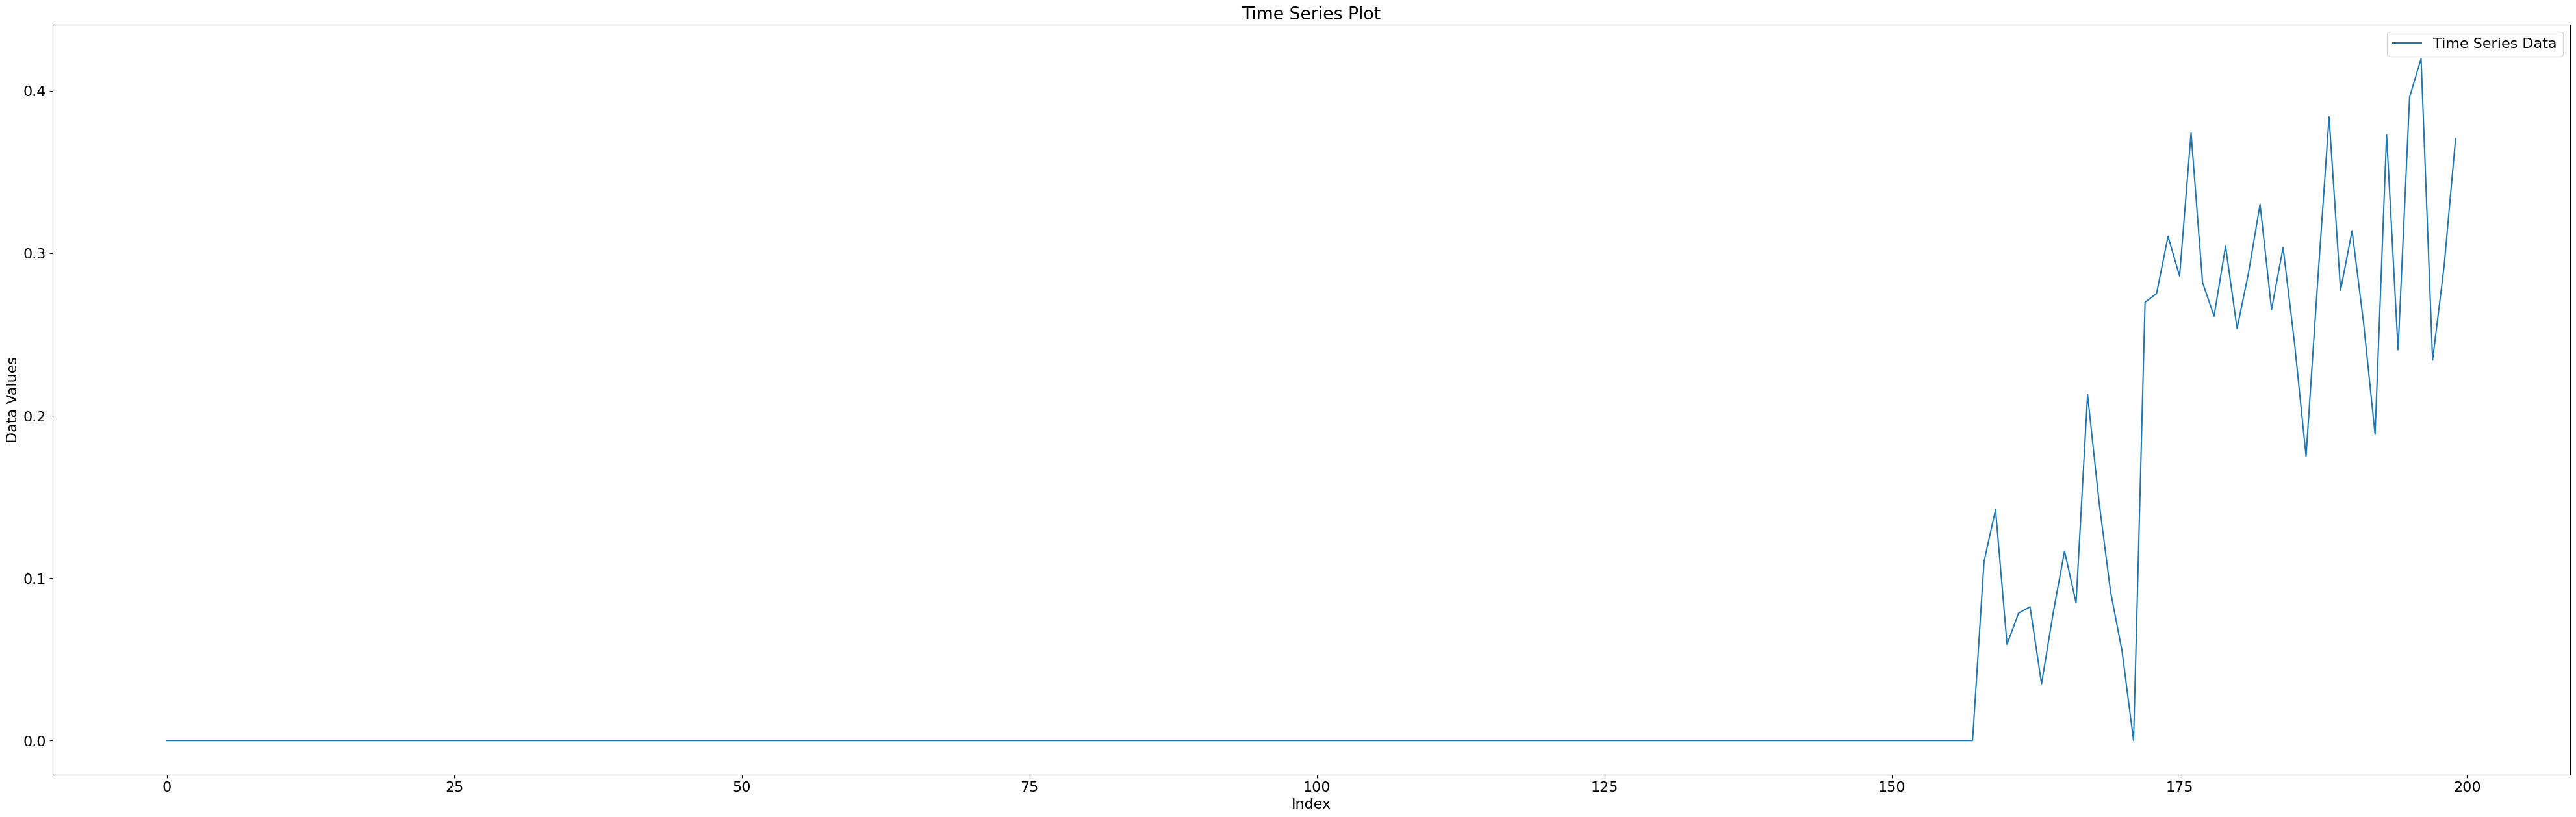

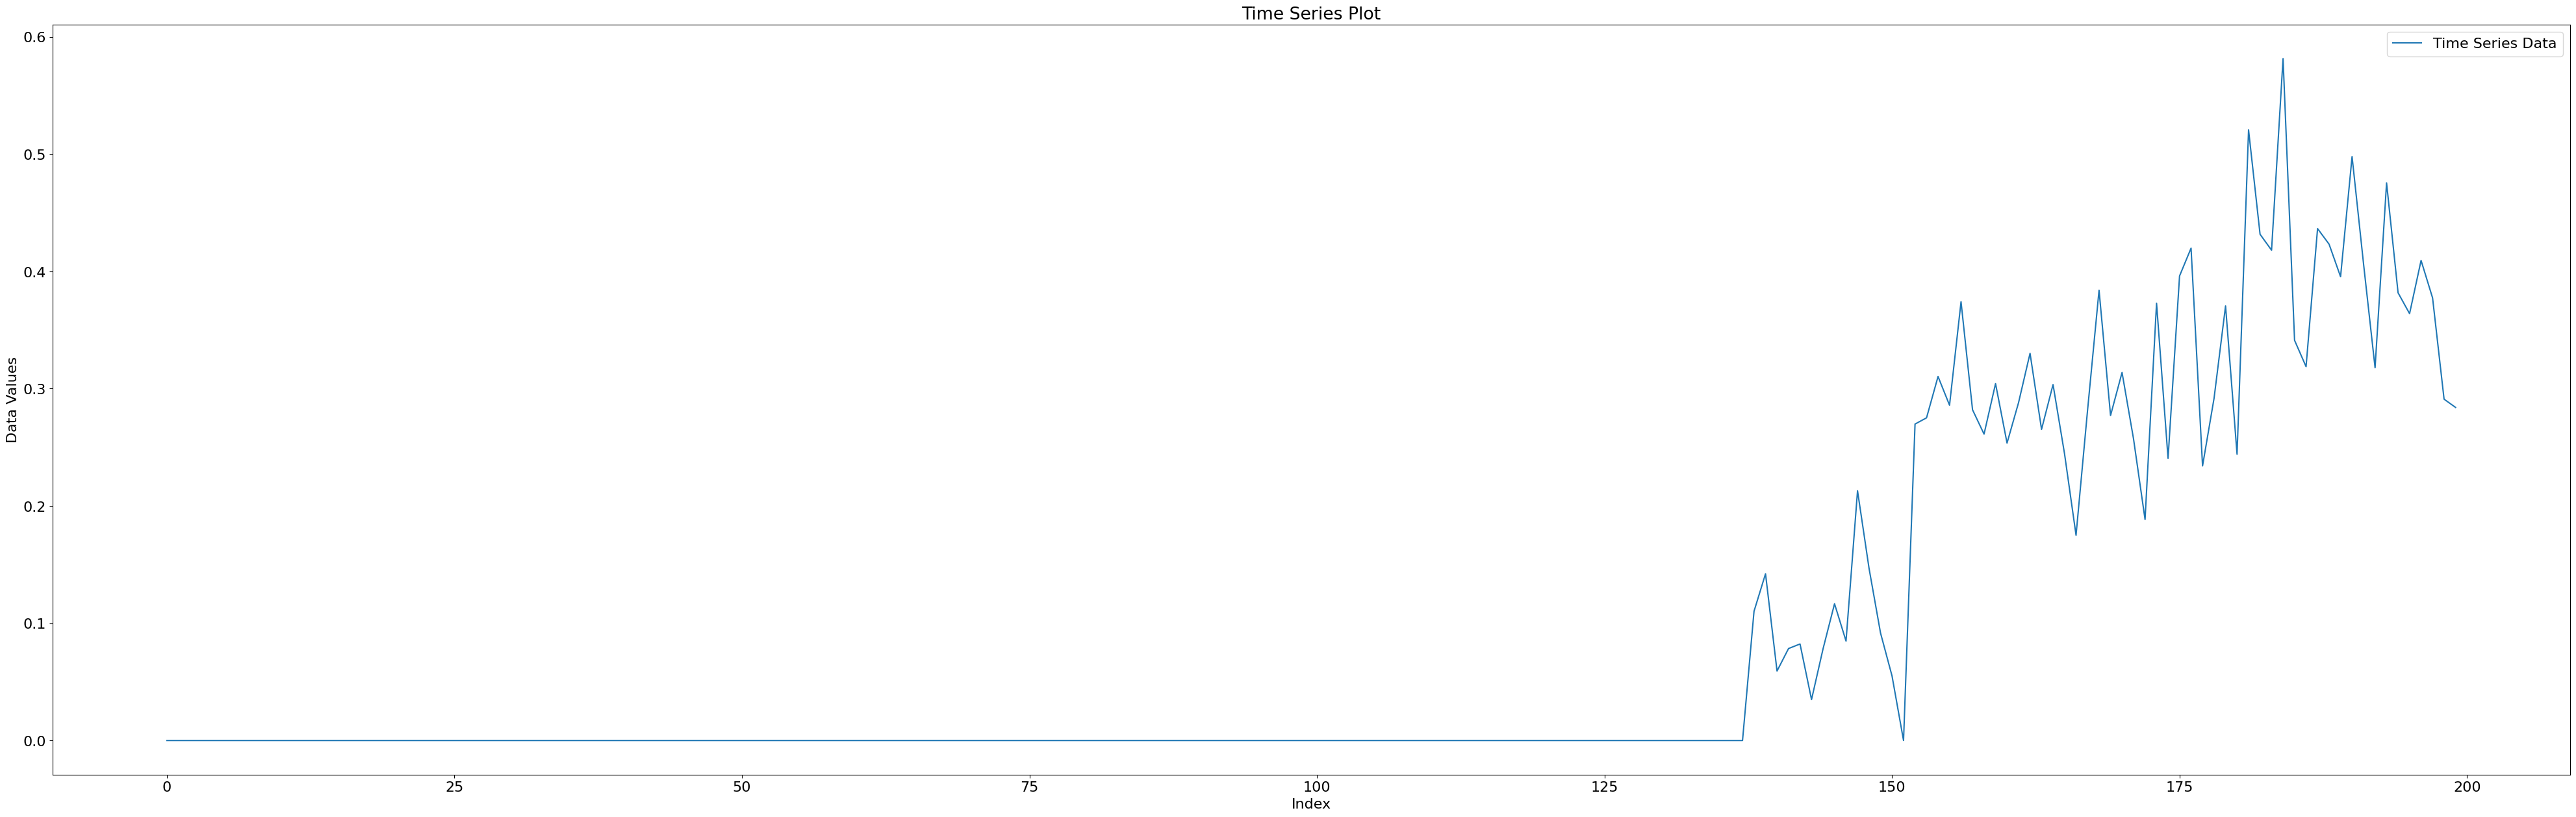

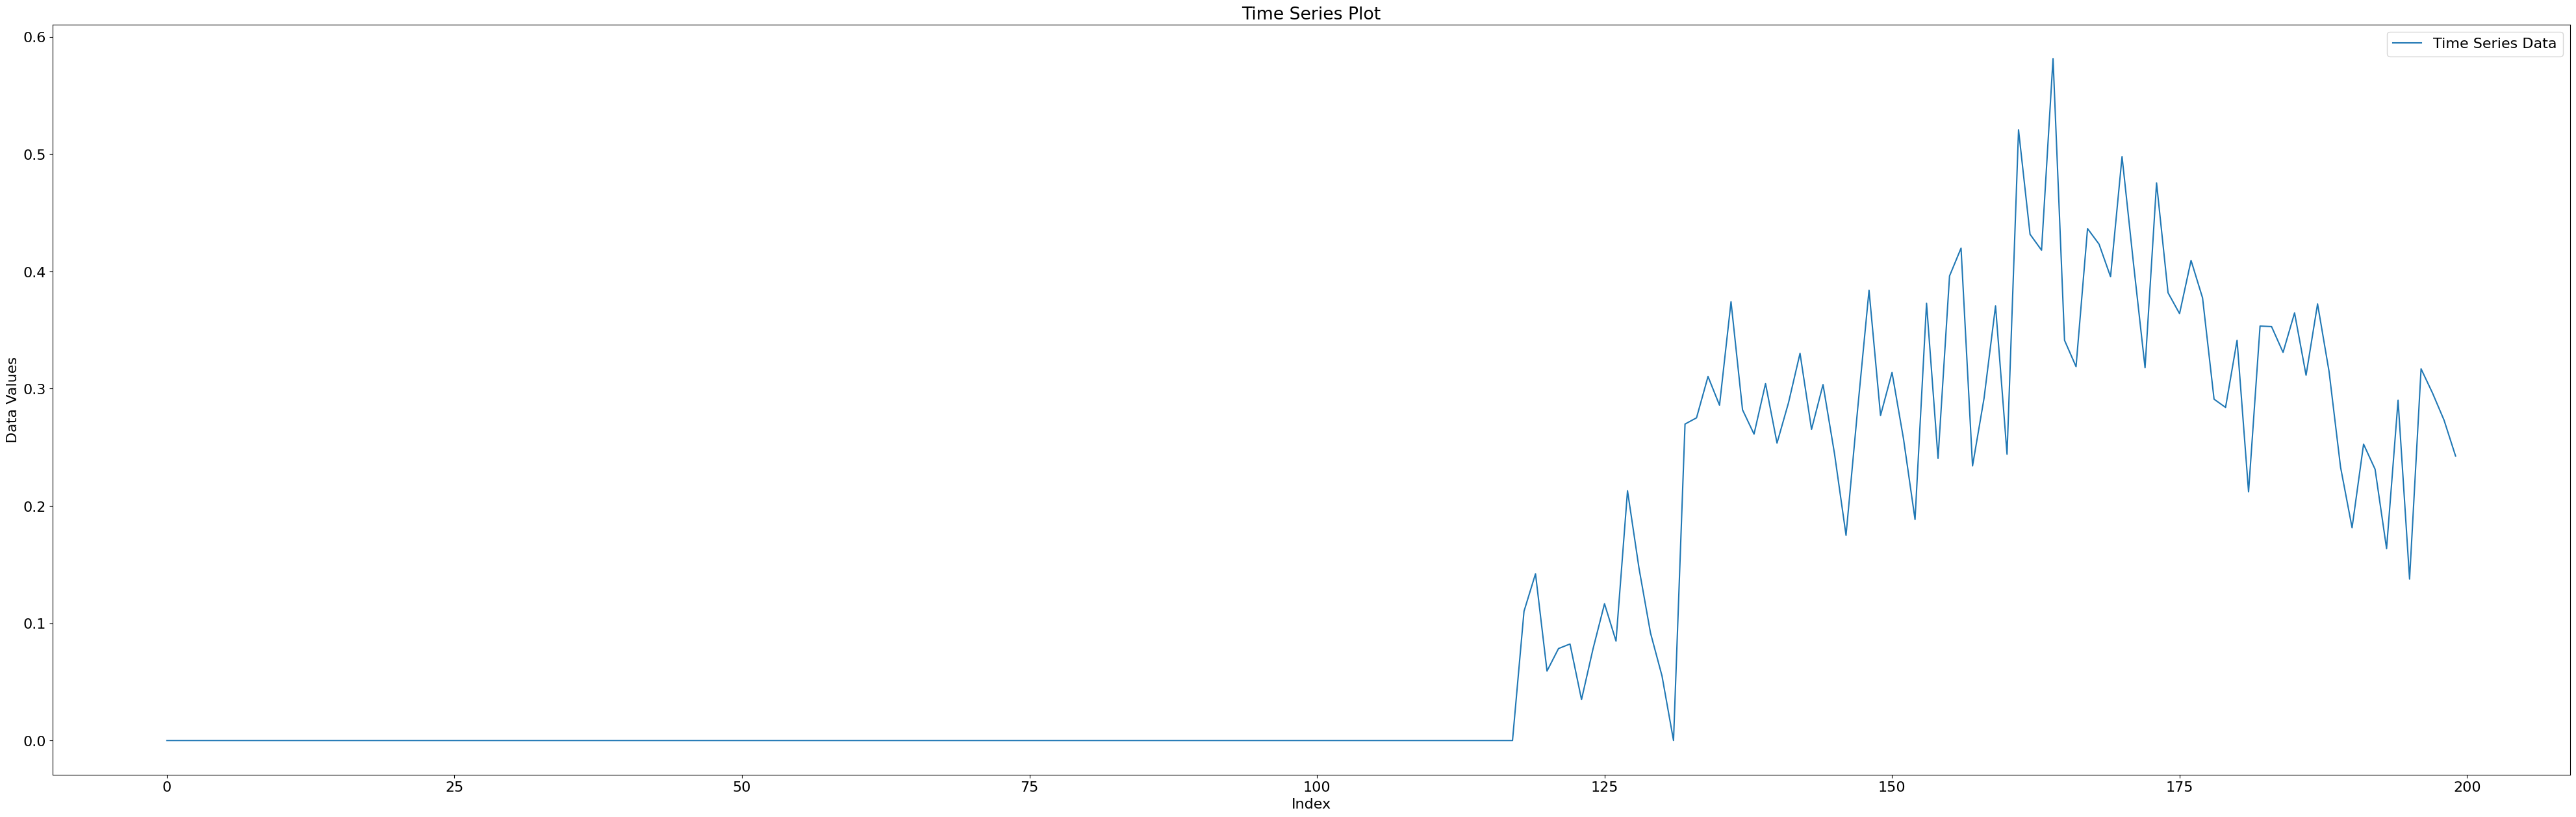

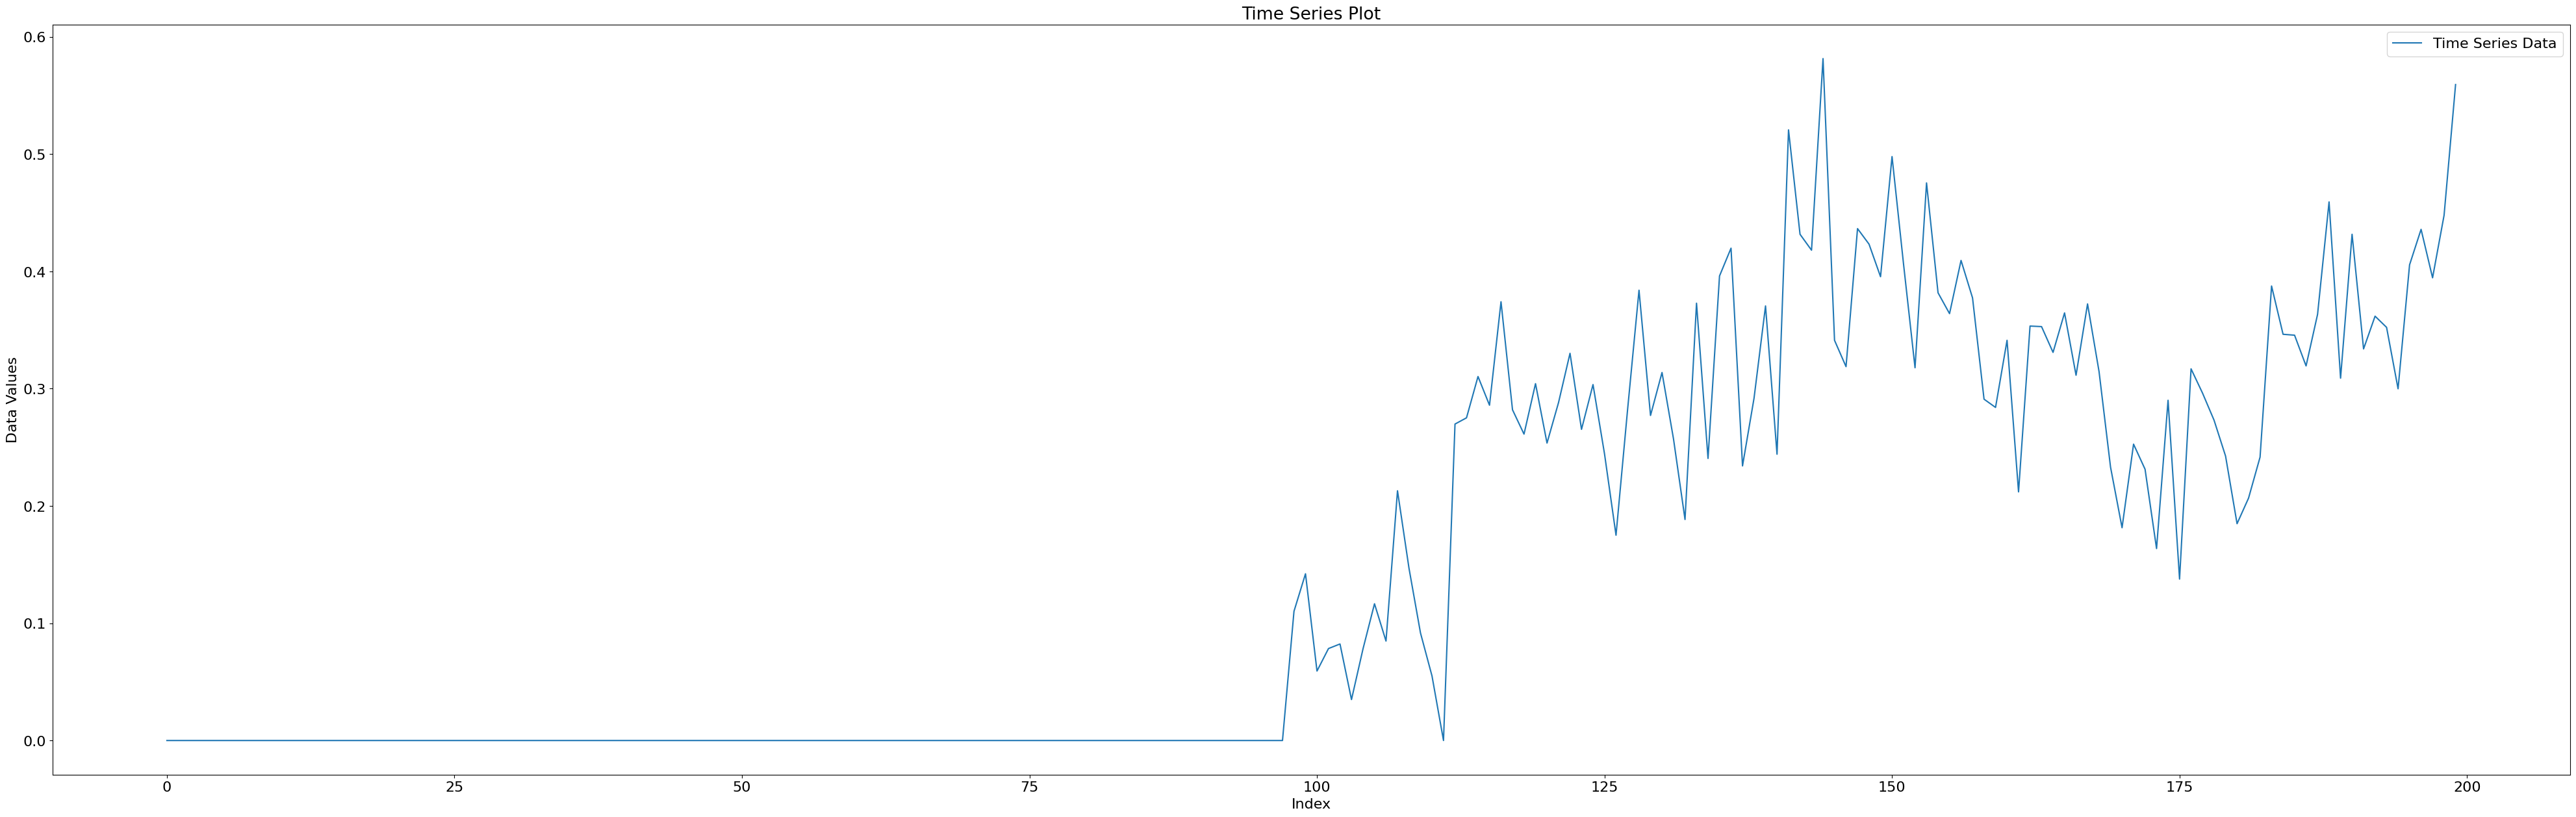

In [32]:
stop = 0
for i, sequence in enumerate(X_train):
    plt.figure(figsize=(50, 15))
    plt.plot(X_train[i].flatten(), label='Time Series Data')
    plt.title('Time Series Plot')
    plt.xlabel('Index')
    plt.ylabel('Data Values')
    plt.legend()
    plt.show()

    stop += 1
    if(stop==5): break

Show an example of input-target couple:

In [33]:
def inspect_multivariate(X, y, telescope, idx=None):
    if(idx==None):
        idx=np.random.randint(0,len(X))

    figs, axs = plt.subplots(1, 1, sharex=True, figsize=(50, 15))
    axs.plot(np.arange(len(X[0,:])), X[idx,:])
    axs.scatter(np.arange(len(X[0,:]), len(X_train[0,:])+telescope), y[idx,:], color='orange')
    axs.set_title("Sequence with telescope")
    axs.set_ylim(0,1)
    plt.show()

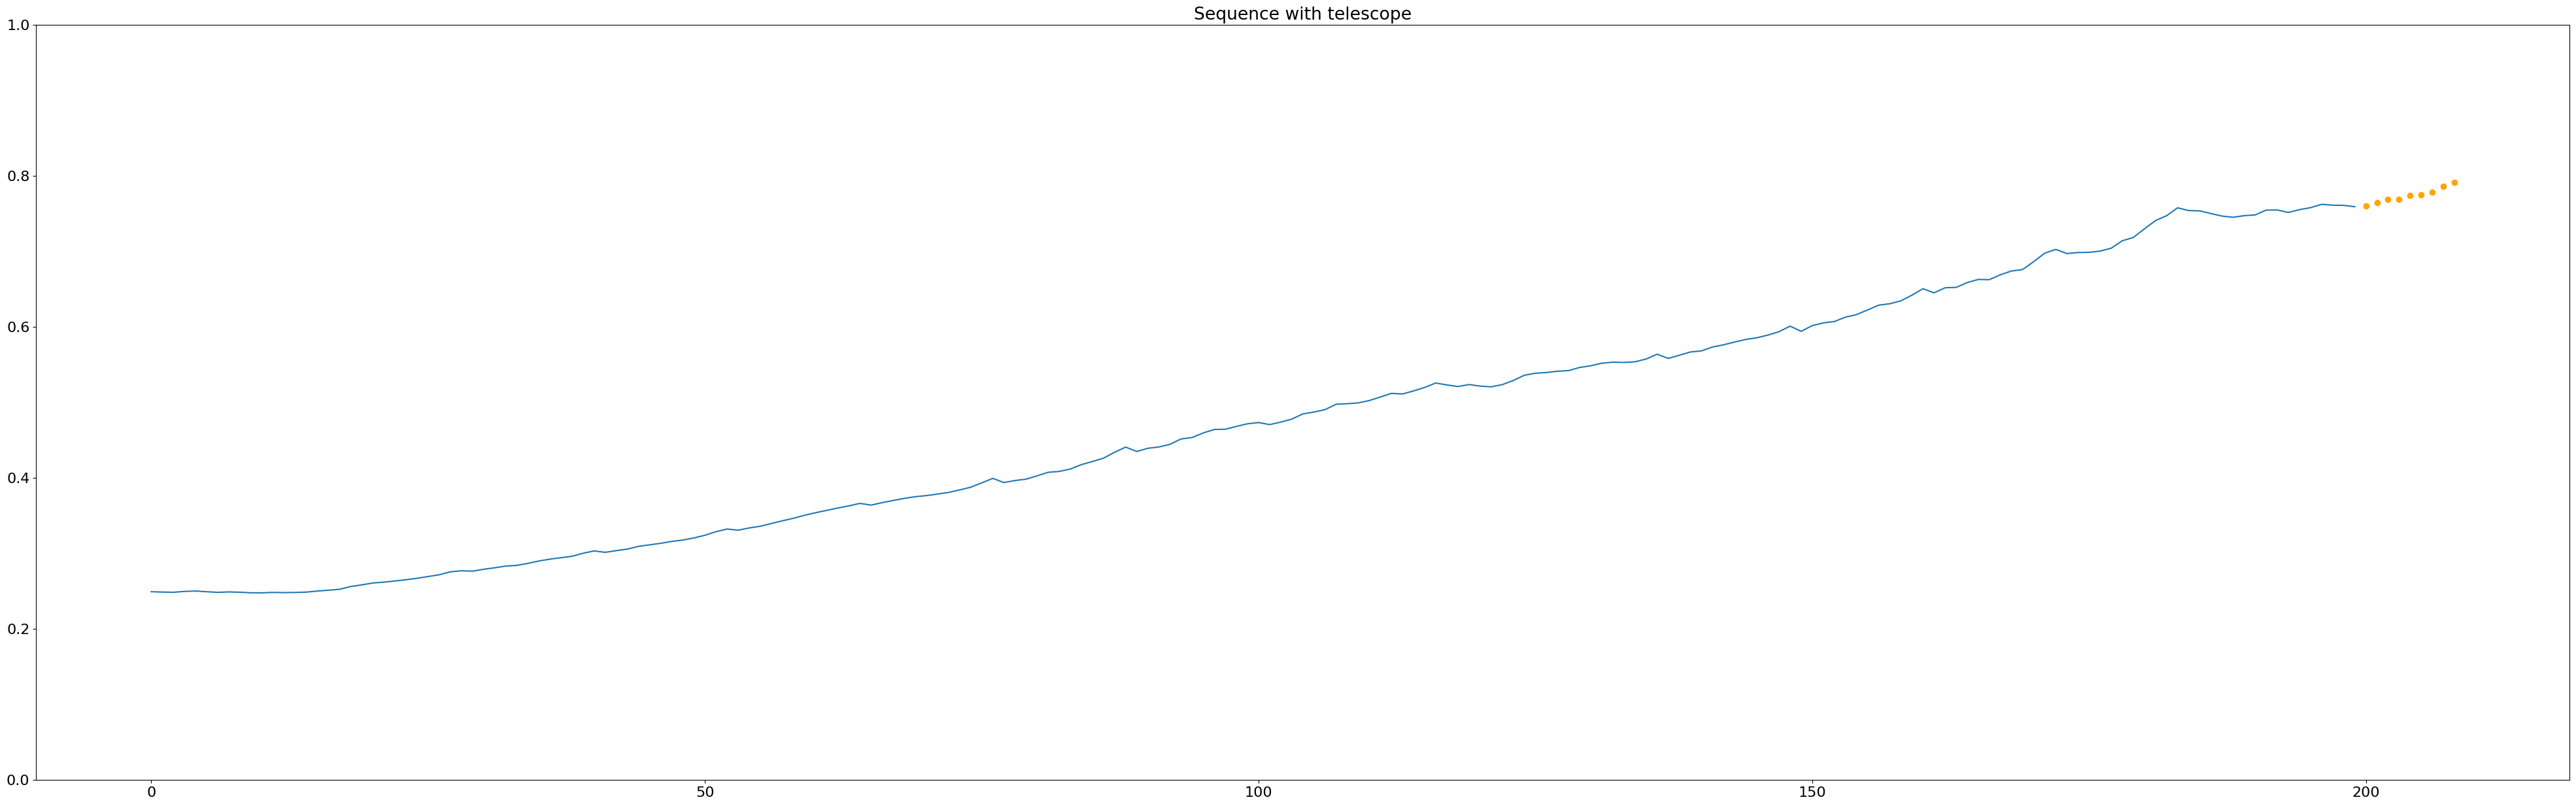

In [34]:
inspect_multivariate(X_train, y_train, telescope=9)

# Model

Define the parameters of the model:

In [35]:
input_shape = X_train.shape[1:]
output_shape = y_train.shape[1:]
batch_size = 512
epochs = 200
print("Input shape: ", input_shape, " => We will feed each chunk of this dimension one at a time.")
print("Output shape: ", output_shape, " => For each input chunk, we will predict an output chunk of this dimension")

Input shape:  (200, 1)  => We will feed each chunk of this dimension one at a time.
Output shape:  (9, 1)  => For each input chunk, we will predict an output chunk of this dimension


Define the model:

In [36]:
def build_CONV_LSTM_model(input_shape, output_shape):
    # Ensure the input time steps are at least as many as the output time steps
    assert input_shape[0] >= output_shape[0], "For this exercise we want input time steps to be >= of output time steps"

    # Define the input layer with the specified shape
    input_layer = tfkl.Input(shape=input_shape, name='input_layer')

    x = tfkl.Conv1D(32, 1, padding='same', activation='relu')(input_layer)
    x = tfkl.Bidirectional(tfkl.LSTM(16, return_sequences=True))(x)
    x = tfkl.Conv1D(32, 3, padding='same', activation='relu')(x)
    #x = tfkl.Conv1D(32, 3, padding='same', activation='relu')(x)
    x = tfkl.MaxPooling1D()(x)
    x = tfkl.Bidirectional(tfkl.LSTM(32, return_sequences=True))(x)

    x = tfkl.Conv1D(64, 3, padding='same', activation='relu')(x)
    #x = tfkl.Conv1D(64, 3, padding='same', activation='relu')(x)
    x = tfkl.MaxPooling1D()(x)
    x = tfkl.Conv1D(128, 3, padding='same', activation='relu')(x)
    #x = tfkl.Conv1D(128, 3, padding='same', activation='relu')(x)
    x = tfkl.MaxPooling1D()(x)
    x = tfkl.Bidirectional(tfkl.LSTM(64, return_sequences=True))(x)

    # Add a final Convolution layer to match the desired output shape
    #output_shape[1] = 3, the channels
    output_layer = tfkl.Conv1D(output_shape[1], 3, padding='same', name='output_layer')(x)

    # Calculate the size to crop from the output to match the output shape
    #A bidirectional lstm gives an output that has the same length as the input. A possible solution is
    #to crop the output
    crop_size = output_layer.shape[1] - output_shape[0]

    # Crop the output to the desired length
    output_layer = tfkl.Cropping1D((0, crop_size), name='cropping')(output_layer)

    # Construct the model by connecting input and output layers
    model = tf.keras.Model(inputs=input_layer, outputs=output_layer, name='CONV_LSTM_model')

    # Compile the model with Mean Squared Error loss and Adam optimizer
    model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam(weight_decay=5e-4), metrics=["mean_absolute_error"]) #RMSprop

    return model

Model: "CONV_LSTM_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 200, 1)]          0         
                                                                 
 conv1d (Conv1D)             (None, 200, 32)           64        
                                                                 
 bidirectional (Bidirection  (None, 200, 32)           6272      
 al)                                                             
                                                                 
 conv1d_1 (Conv1D)           (None, 200, 32)           3104      
                                                                 
 max_pooling1d (MaxPooling1  (None, 100, 32)           0         
 D)                                                              
                                                                 
 bidirectional_1 (Bidirecti  (None, 100, 64)       

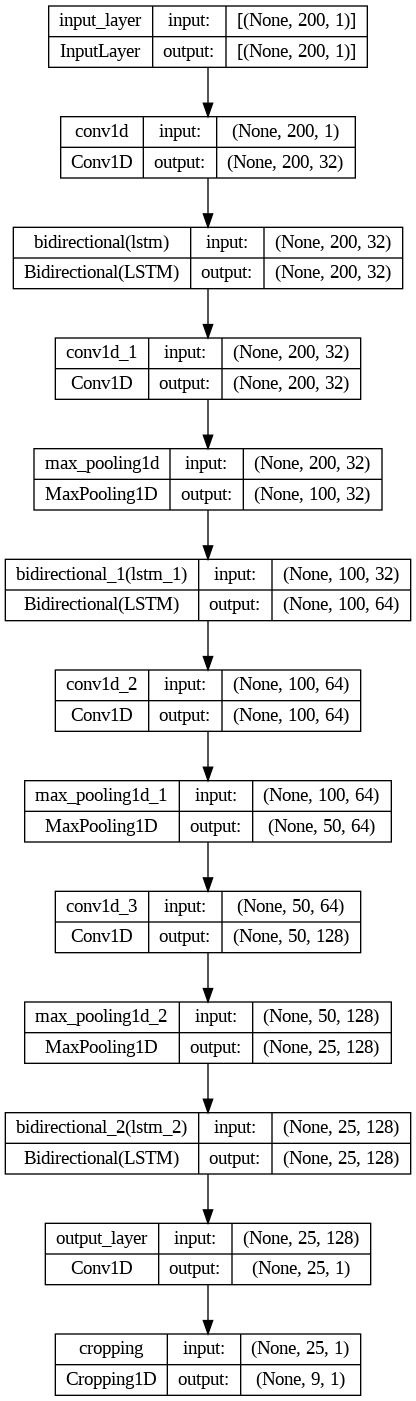

In [37]:
model = build_CONV_LSTM_model(input_shape, output_shape)
model.summary()
tfk.utils.plot_model(model, expand_nested=True, show_shapes=True)

Train the model:

In [38]:
# Train the model
history = model.fit(
    x = X_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = (X_val, y_val),
    #validation_split=0.1,
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=12, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min', patience=8, factor=0.1, min_lr=1e-5)
    ]
).history

Epoch 1/200
473/473 [==============================] - 45s 56ms/step - loss: 0.0187 - mean_absolute_error: 0.0925 - val_loss: 0.0103 - val_mean_absolute_error: 0.0698 - lr: 0.0010
Epoch 2/200
473/473 [==============================] - 24s 51ms/step - loss: 0.0097 - mean_absolute_error: 0.0663 - val_loss: 0.0098 - val_mean_absolute_error: 0.0670 - lr: 0.0010
Epoch 3/200
473/473 [==============================] - 28s 58ms/step - loss: 0.0094 - mean_absolute_error: 0.0648 - val_loss: 0.0094 - val_mean_absolute_error: 0.0632 - lr: 0.0010
Epoch 4/200
473/473 [==============================] - 22s 47ms/step - loss: 0.0089 - mean_absolute_error: 0.0626 - val_loss: 0.0093 - val_mean_absolute_error: 0.0650 - lr: 0.0010
Epoch 5/200
473/473 [==============================] - 22s 46ms/step - loss: 0.0086 - mean_absolute_error: 0.0615 - val_loss: 0.0086 - val_mean_absolute_error: 0.0609 - lr: 0.0010
Epoch 6/200
473/473 [==============================] - 21s 45ms/step - loss: 0.0082 - mean_absolute_

Plot training and validation loss over time:

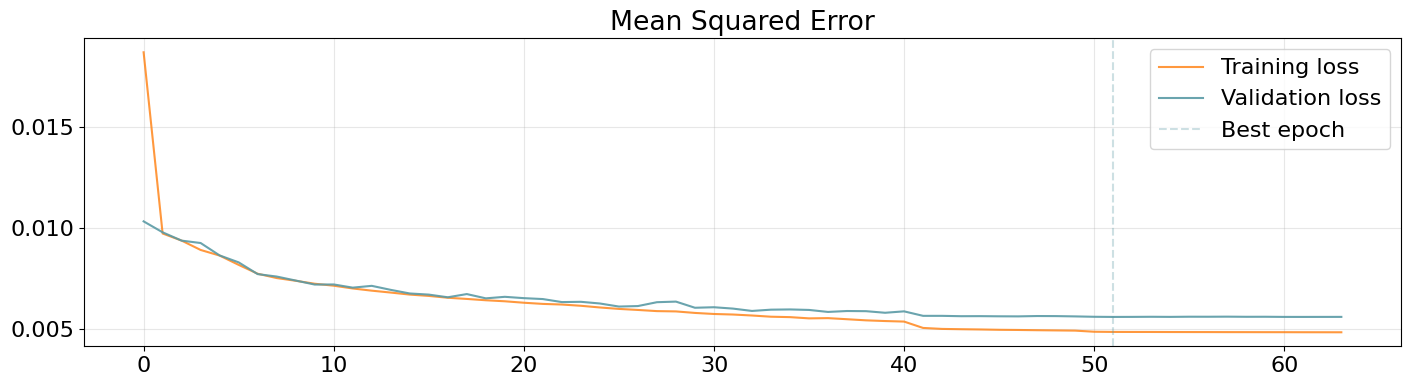

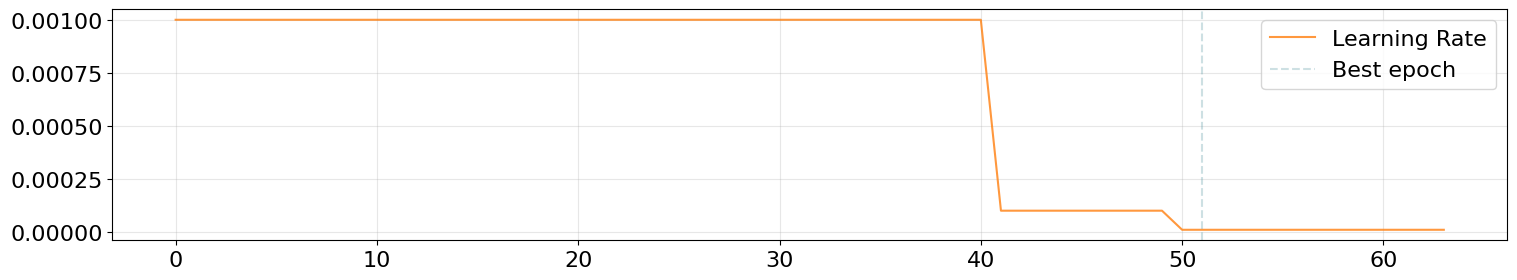

In [39]:
best_epoch = np.argmin(history['val_loss'])
plt.figure(figsize=(17,4))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation loss', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Mean Squared Error')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(18,3))
plt.plot(history['lr'], label='Learning Rate', alpha=.8, color='#ff7f0e')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.legend()
plt.grid(alpha=.3)
plt.show()

Save the model:

In [40]:
model.save('LSTM')